<h1 style="text-align:center">CLASSIFICATION OF BREAST CANCER CELLS</h1>

<hr>

<div style="text-align:justify;font-size:17px;">Cancer is one of the most dangerous diseases in today’s society. Worldwide, 18.1 million people is diagnosed with having cancer and 9.6 million died because of cancer in 2018. One of every 5 men and one of every 6 women are have been diagnosed with having cancer during their lives. One of every 8 men and one of every 11 women die from cancer. There are various types of cancer and female breast cancer is a well-known type of cancer. It caused 627.000 deaths in 2018 which is approximately 6.6% of the total number of deaths caused by any type of cancer in 2018. However, it is relatively easier to detect breast cancer compared to other types of cancers, especially in more developed countries. https://www.who.int/cancer/PRGlobocanFinal.pdf</div>
<br>
<div style="text-align:justify;font-size:17px;">This project aims to increase the prediction accuracy of the classification of the cancer cells for the corresponding patients, as benign or malignant. In order to detect the sickness of the cells various Machine Learning algorithms are used. In order to train and test the program a dataset is used. For obtaining the dataset, cells taken from the patients are observed by using the digitized images of the cells. Then, the features for data training are created based the different properties of the cell. In this project, the dataset is taken from Kaggle. https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. In Kaggle, the data is preprocessed so there are suitable values for every label for each cell. This dataset has 569 cells and each cell has 30 features. 70% of the dataset is used for training the algorithms in order to get estimations and the 30% of the dataset are used for testing the accuracy of the program. </div>
<br>
<div style="text-align:justify;font-size:17px;">The features of the cells are based on the grayscale images of them. There are 30 features and they are based on the properties of the cell; such as size of the cell where radius, perimeter and area are observed or the patterns on the cell where standard deviations in gray-scale values, variation is radius lengths and the general symmetry of the cell are measured or the shape of the cell where the concave points of the cell and proportions of radius and perimeter to each other are observed. The high number of the used features and the variance in the type of the features makes the data classification and detection of the cancer cells a lot easier.</div>
<br>
<div style="text-align:justify;font-size:17px;">In this project, various concepts are used for evaluating the cells and increasing the accuracy of cancer detection. These concepts are Principal Component Analysis (PCA), Logistic Regression Classification, K-Nearest Neighbors (KNN) Classification, Support Vector Machine (SVM) Classification, Decision Tree Classification and Naïve Bayes Classification. Algorithms of these concepts will be explained in detail in the other parts of the code.</div>

<h3 style="text-align:center">Pre-processing</h3>
<hr>
<div style="text-align:justify;font-size:17px;">First we import the dataset and then shuffle it as standard practice. Then the next step is to identify the labels and the features in the dataset. The labels are labelled as either 1 for malignant or 0 for benign. Similarly the features are extracted and their values are normalized from 0 to 1. </div>



In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import torch.nn as nn
import torch

from sklearn.exceptions import DataConversionWarning
dfFeatures = pd.read_csv('dataset.csv')

# dividing the dataset to labels and features
dfLabels = pd.DataFrame([1 if each == 'M' else 0 for each in dfFeatures.diagnosis], columns=["label"])
dfFeatures.drop(['id','diagnosis','Unnamed: 32'], axis = 1 ,inplace=True)

# normalizing the dataset.
dfFeatures = (dfFeatures - dfFeatures.min()) / (dfFeatures.max() - dfFeatures.min())

<h3 style="text-align:center">Principal Component Analysis (PCA)</h3>
<hr>
<div style="text-align:justify;font-size:17px;">The second part of the pre-processing step is to apply the PCA (principle component analysis) algorithm. This is a very powerful algorithm and is widely used to reduce the dimension size and variance of features in a dataset. It ranks the eigenvalues of a feature vector of the dataset, the corresponding eigenvector to the largest eigenvalue becomes the first principle component and so on. Are purpose was to construct one 2D and one 3D model so we used drew out the first, second and third principle components. To check the performance of these two models, we printed out the variances of each dimension and the sum of these variances. The variance sum for the 2D model was 0.7038117901347686 while for the 3D model it was 0.7749562100792776. The dimensional variances were [0.53097689 0.1728349 ] and [0.53097689 0.1728349  0.07114442]. Here we make the observation that the 3 principle component has very little variance so it is not as useful to us as the first two. Therefore, the 2D model should suffice  normally however we will also use the 3D model for added complexity. </div>

In [6]:
# importing PCA
from sklearn.decomposition import PCA

# constructing 3D model.
pca_3D_model = PCA(n_components = 3, whiten = True)
pca_3D_model.fit(dfFeatures)
npFeatures_3D = pca_3D_model.transform(dfFeatures)
dfFeatures_3D = pd.DataFrame(npFeatures_3D, columns=['param1', 'param2', 'param3'])
dfLabels_3D = dfLabels.copy()

# constructing 2D model.
pca_2D_model = PCA(n_components = 2, whiten = True)
pca_2D_model.fit(dfFeatures)
npFeatures_2D = pca_2D_model.transform(dfFeatures)
dfFeatures_2D = pd.DataFrame(npFeatures_2D, columns=['param1', 'param2'])
dfLabels_2D = dfLabels.copy()

# printing out the variance ratio and sum for 3D
print('-------------------------------------------------------------')
print('Variance Ratio: ' + str(pca_3D_model.explained_variance_ratio_))
print('Variance Sum  : ' + str(sum(pca_3D_model.explained_variance_ratio_)))
print('-------------------------------------------------------------')

# printing out the variance ratio and sum for 2D
print('-------------------------------------------------------------')
print('Variance Ratio for 2D: ' + str(pca_2D_model.explained_variance_ratio_))
print('Variance Sum for 2D : ' + str(sum(pca_2D_model.explained_variance_ratio_)))
print('-------------------------------------------------------------')

-------------------------------------------------------------
Variance Ratio: [0.53097689 0.1728349  0.07114442]
Variance Sum  : 0.7749562101755897
-------------------------------------------------------------
-------------------------------------------------------------
Variance Ratio for 2D: [0.53097689 0.1728349 ]
Variance Sum for 2D : 0.7038117901347689
-------------------------------------------------------------


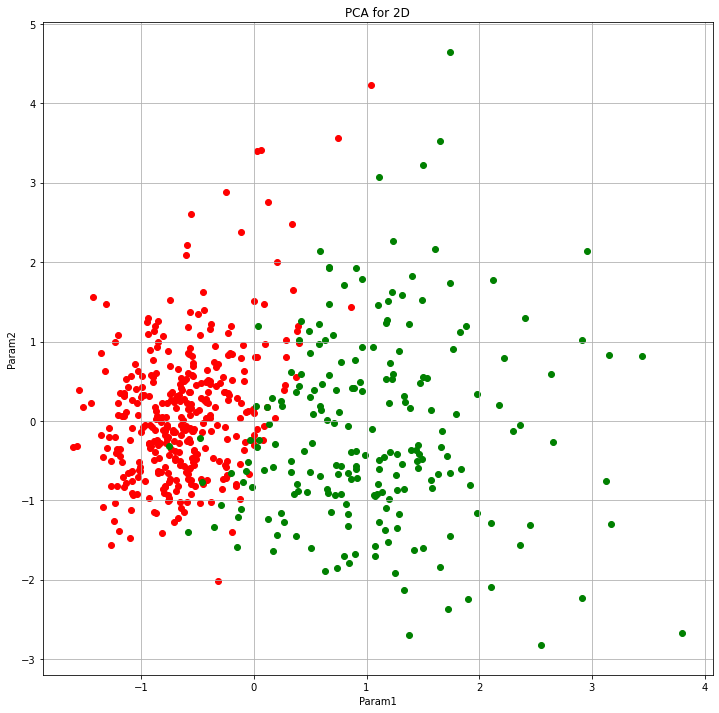

In [7]:
# Scatter Plot 
dfTemp_2D = pd.concat([dfFeatures_2D, dfLabels_2D], axis=1)
plt.figure(figsize=(12,12))
plt.scatter(dfTemp_2D.param1[dfTemp_2D.label == 0], dfTemp_2D.param2[dfTemp_2D.label == 0], color='red')
plt.scatter(dfTemp_2D.param1[dfTemp_2D.label == 1], dfTemp_2D.param2[dfTemp_2D.label == 1], color='green')
plt.xlabel('Param1')
plt.ylabel('Param2')
plt.title('PCA for 2D')
plt.grid()

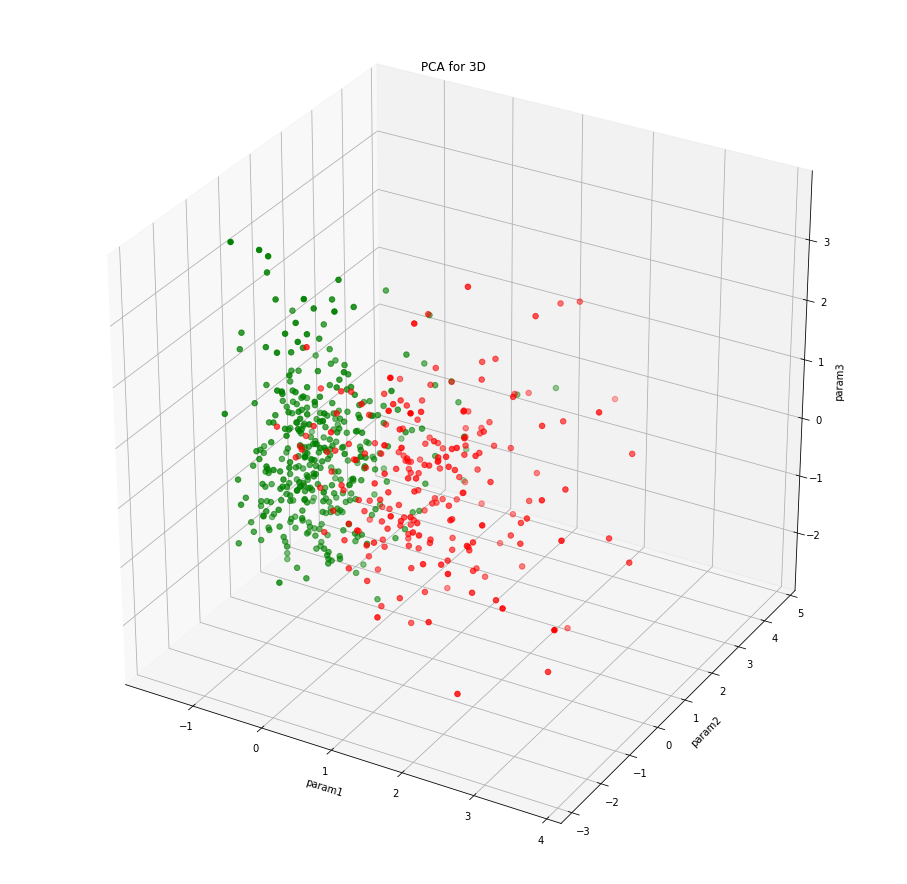

In [8]:
from mpl_toolkits.mplot3d import axes3d
dfTemp_3D = pd.concat([dfFeatures_3D, dfLabels_3D], axis=1)

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
x = dfTemp_3D.param1;
y = dfTemp_3D.param2;
z = dfTemp_3D.param3;

ax.scatter(x[dfTemp_3D.label == 0], y[dfTemp_3D.label == 0], z[dfTemp_3D.label == 0], c = 'g', marker = 'o', s=30)
ax.scatter(x[dfTemp_3D.label == 1], y[dfTemp_3D.label == 1], z[dfTemp_3D.label == 1], c = 'r', marker = 'o', s=30)
ax.set_xlabel('param1')
ax.set_ylabel('param2')
ax.set_zlabel('param3')
plt.title('PCA for 3D')
plt.show()

<h3 style="text-align:center">CORRELATION MATRIX</h3>
<hr>

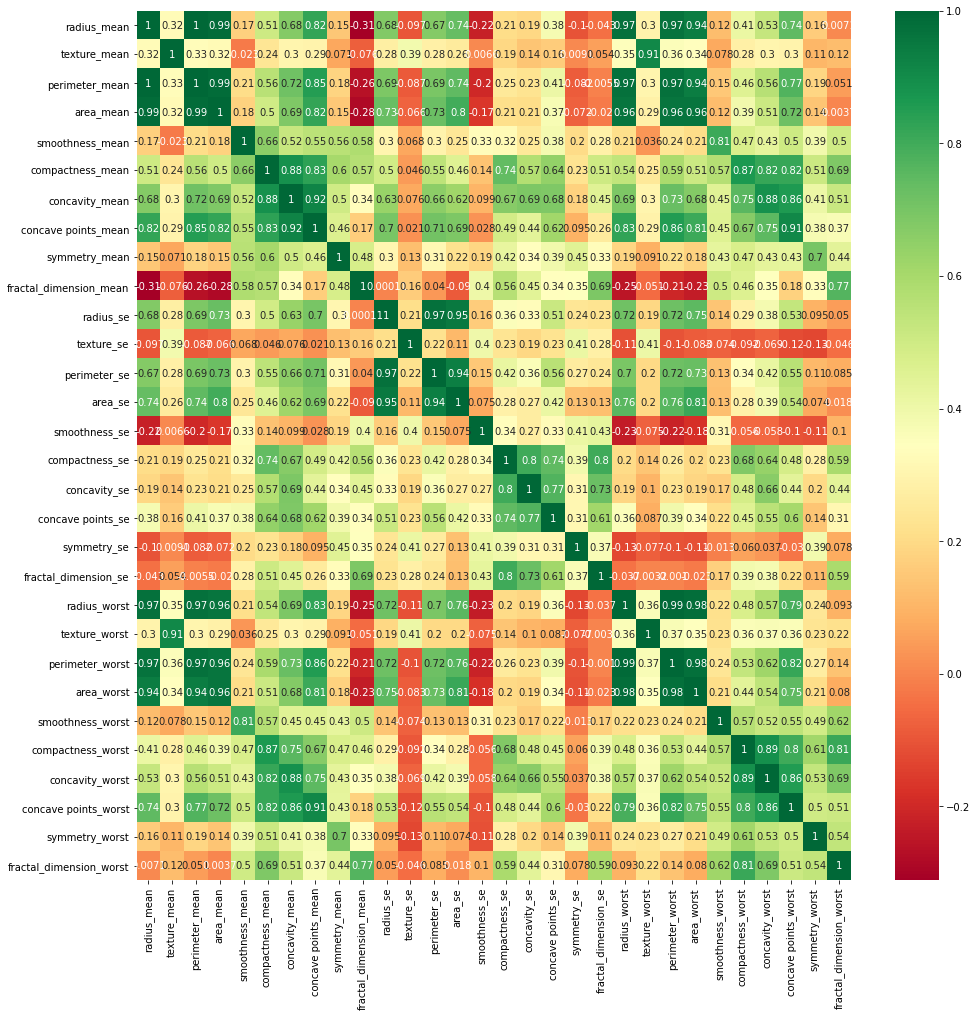

In [9]:
# showing the correlations through a heatmap
correlation_matrix = dfFeatures.corr()
top_correlated_features = correlation_matrix.index
plt.figure(figsize=(16, 16))
g=sns.heatmap(dfFeatures[top_correlated_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

<h3 style="text-align:center">SELECTING BEST 4 features</h3>
<hr>


<div style="text-align:justify;font-size:17px;">The Chi-Square method basically checks the independency of two variables, that is, it checks whether there is a considerable correlation between them. According to these correlations, it ranks the features according to theier importances. In this part, we used this method to select the 4 Best features and plotted its graph. These selected features will be used in the upcoming algorithms. The following represents the formula of chi squared method:</div>

<img style="margin:50px auto;" src="https://www.thoughtco.com/thmb/ns7d4DC1AqVGme2p1-WYqC26r_s=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/latex_ac74fec08532861eb5f8b87226ebf396-5c59a6fcc9e77c00016b4195.jpg">


In [11]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecting best features with chi square statistical method
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(dfFeatures,dfLabels)
x_train_selected2 = fit.transform(dfFeatures)
df_scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dfFeatures.columns)
#concat two dataframes for better visualization
fScores = pd.concat([dfcolumns,df_scores],axis=1)
fScores.columns = ['Features','Score']

# getting the best 4 features as a dataframe.
dfFeatures_4B = dfFeatures.iloc[:, [6, 7, 11, 27]].copy()
dfLabels_4B = dfLabels.copy()

# printing out 4 Best features
fScores.nlargest(4,'Score')

,Features,Score
7,concave points_mean,52.405743
27,concave points_worst,46.341648
6,concavity_mean,46.186395
23,area_worst,35.043882


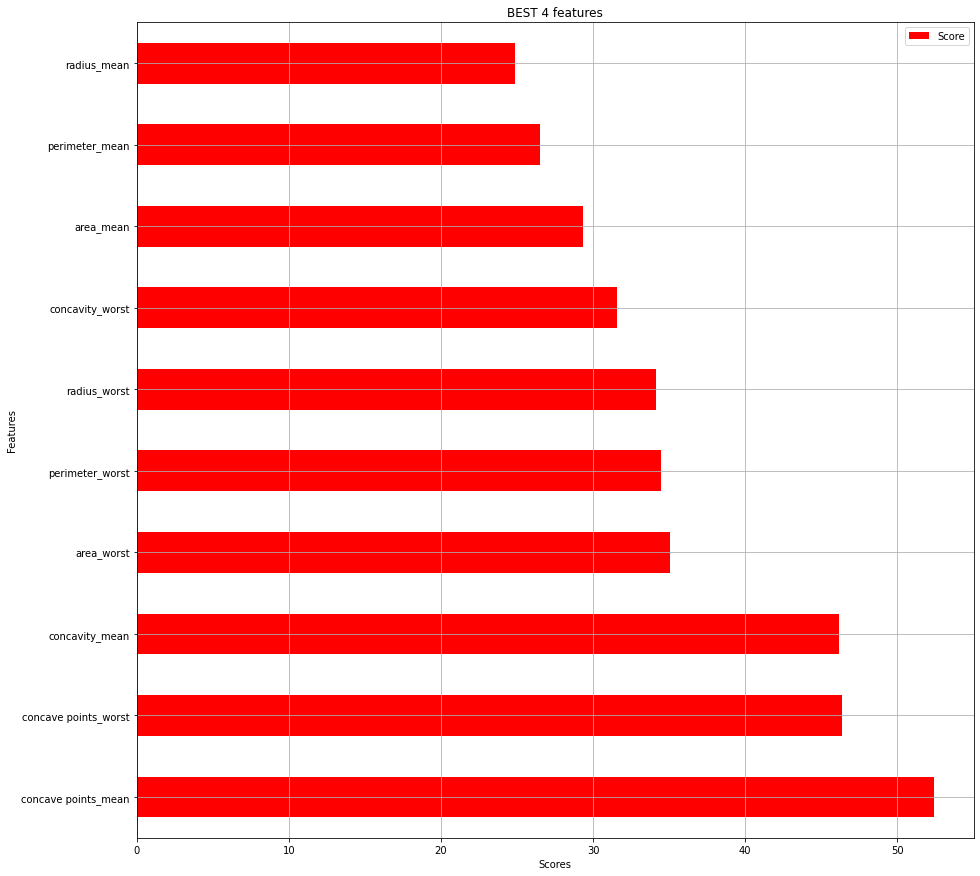

In [12]:
f, ax = plt.subplots(figsize = (15, 15))
fScores = fScores.nlargest(10,'Score')
fScores.index = fScores.Features      
fScores.plot(kind='barh', ax=ax, color="red")
plt.title("BEST 4 features")
plt.ylabel("Features")
plt.xlabel("Scores")
plt.grid()

<h3 style="text-align:center">Splitting the Data to Train and Test Data</h3>
<hr>
<div style="text-align:justify;font-size:17px;">For this part, the sklearn.model_selection library was imported for its train_test_split method to split the datasets into train features, train labels, test features and test labels. Splitting into these 4 arrays are done for initial raw data, 2-dimensional PCA, 3-dimensional PCA and the initial data with 4 Best features which will make classification easier in the future steps. </div>

In [0]:
# importing the data.
from sklearn.model_selection import train_test_split

# splitting for initial data with 30 features
dfTrainFeatures, dfTestFeatures, dfTrainLabels, dfTestLabels = train_test_split(dfFeatures, dfLabels, test_size = 0.3, random_state = 42) 

# splitting for PCA data that has 3 dimensions.
from sklearn.model_selection import train_test_split
dfTrainFeatures_3D, dfTestFeatures_3D, dfTrainLabels_3D, dfTestLabels_3D = train_test_split(dfFeatures_3D, dfLabels_3D, test_size = 0.3, random_state = 42)

# splitting for PCA data that has 2 dimensions.
from sklearn.model_selection import train_test_split
dfTrainFeatures_2D, dfTestFeatures_2D, dfTrainLabels_2D, dfTestLabels_2D = train_test_split(dfFeatures_2D, dfLabels_2D, test_size = 0.3, random_state = 42)

# splitting for PCA data that has the best 4 features
from sklearn.model_selection import train_test_split
dfTrainFeatures_4B, dfTestFeatures_4B, dfTrainLabels_4B, dfTestLabels_4B = train_test_split(dfFeatures_4B, dfLabels_4B, test_size = 0.3, random_state = 42)

In [0]:
# converting pandas data frames also to numpy arays
npTrainFeatures = dfTrainFeatures.values
npTestFeatures  = dfTestFeatures.values
npTrainLabels   = dfTrainLabels.values
npTestLabels    = dfTestLabels.values

npTrainFeatures_2D = dfTrainFeatures_2D.values
npTestFeatures_2D  = dfTestFeatures_2D.values
npTrainLabels_2D   = dfTrainLabels_2D.values
npTestLabels_2D    = dfTestLabels_2D.values

npTrainFeatures_3D = dfTrainFeatures_3D.values
npTestFeatures_3D  = dfTestFeatures_3D.values
npTrainLabels_3D   = dfTrainLabels_3D.values
npTestLabels_3D    = dfTestLabels_3D.values

npTrainFeatures_4B = dfTrainFeatures_4B.values
npTestFeatures_4B  = dfTestFeatures_4B.values
npTrainLabels_4B   = dfTrainLabels_4B.values
npTestLabels_4B    = dfTestLabels_4B.values

# converting numpy arrays also to tensors
tensorTrainFeatures = torch.tensor( npTrainFeatures )
tensorTestFeatures  = torch.tensor( npTestFeatures  )
tensorTrainLabels   = torch.tensor( npTrainLabels   )
tensorTestLabels    = torch.tensor( npTestLabels    )

tensorTrainFeatures_2D = torch.tensor( npTrainFeatures_2D )
tensorTestFeatures_2D  = torch.tensor( npTestFeatures_2D  )
tensorTrainLabels_2D   = torch.tensor( npTrainLabels_2D   )
tensorTestLabels_2D    = torch.tensor( npTestLabels_2D    )

tensorTrainFeatures_3D = torch.tensor( npTrainFeatures_3D )
tensorTestFeatures_3D  = torch.tensor( npTestFeatures_3D  )
tensorTrainLabels_3D   = torch.tensor( npTrainLabels_3D   )
tensorTestLabels_3D    = torch.tensor( npTestLabels_3D    )

tensorTrainFeatures_4B = torch.tensor( npTrainFeatures_4B )
tensorTestFeatures_4B  = torch.tensor( npTestFeatures_4B  )
tensorTrainLabels_4B   = torch.tensor( npTrainLabels_4B   )
tensorTestLabels_4B    = torch.tensor( npTestLabels_4B    )

######################## HALIL ################################

<h3 style="text-align:center">LOGISTIC REGRESSION CLASSIFICATION</h3>
<hr>
<div style="text-align:justify;font-size:17px;">Logistic regression (a misnomer) is a classification algorithm that fits data to a sigmoid function of the form  where  is the linear regression function  where  is the set of parameters and  is the feature set. This algorithm works best when the labels exhibit the most probability for a set of features above a certain threshold and vice versa. We used the LogisticRegression library from sklearn.linear_model. Using the just the initial data, we fitted the train features and labels to the model and then used that same model to calculate the prediction accuracy on our test labels and features. We repeated this process for 2D PCA and 3D PCA and initial data with 4 Best features. Results are printed out and shown in Confusion Matrix, ROC curve and precision-recall curve.  </div>

In [17]:
# importing the model.
from sklearn.linear_model import LogisticRegression

# applying logistic regression to initial data.
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_lr = logistic_regression_model.score(dfTestFeatures, dfTestLabels)
predictions_lr = logistic_regression_model.predict(dfTestFeatures)
predictions_lr_prob = logistic_regression_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_lr, macro_recall_lr, macro_fscore_lr, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr, average='macro')
micro_precision_lr, micro_recall_lr, micro_fscore_lr, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr, average='micro')


# applying logistic regression to PCA data that has 3 dimensions.
logistic_regression_model_3D = LogisticRegression()
logistic_regression_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_3D_lr = logistic_regression_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_lr_3D = logistic_regression_model_3D.predict(dfTestFeatures_3D)
predictions_lr_3D_prob = logistic_regression_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_lr_3D, macro_recall_lr_3D, macro_fscore_lr_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_3D, average='macro')
micro_precision_lr_3D, micro_recall_lr_3D, micro_fscore_lr_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_3D, average='micro')


# applying logistic regression to PCA data that has 2 dimensions.
logistic_regression_model_2D = LogisticRegression()
logistic_regression_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_2D_lr = logistic_regression_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_lr_2D = logistic_regression_model_2D.predict(dfTestFeatures_2D)
predictions_lr_2D_prob = logistic_regression_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_lr_2D, macro_recall_lr_2D, macro_fscore_lr_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_2D, average='macro')
micro_precision_lr_2D, micro_recall_lr_2D, micro_fscore_lr_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_2D, average='micro')


# applying logistic regression to PCA data that has 4 Best features.
logistic_regression_model_4B = LogisticRegression()
logistic_regression_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
acurracy_4B_lr = logistic_regression_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
predictions_lr_4B = logistic_regression_model_4B.predict(dfTestFeatures_4B)
predictions_lr_4B_prob = logistic_regression_model_4B.predict_proba(dfTestFeatures_4B)[:,1]
macro_precision_lr_4B, macro_recall_lr_4B, macro_fscore_lr_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_4B, average='macro')
micro_precision_lr_4B, micro_recall_lr_4B, micro_fscore_lr_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_lr_4B, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [18]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_lr    ))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_2D_lr ))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_3D_lr ))
print('ACURRACY FOR (4 Best FEA.)  : ' + str(acurracy_4B_lr))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_lr))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_lr_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_lr_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_lr_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_lr))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_lr_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_lr_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_lr_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_lr))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_lr_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_lr_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_lr_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_lr))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_lr_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_lr_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_lr_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_lr))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_lr_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_lr_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_lr_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_lr))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_lr_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_lr_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_lr_4B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9766081871345029
ACURRACY FOR PCA (2DIMENSION): 0.9649122807017544
ACURRACY FOR PCA (3DIMENSION): 0.9707602339181286
ACURRACY FOR (4 Best FEA.)  : 0.9122807017543859
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9821428571428572
MACRO PRECISION PCA (2DIMENSION): 0.969203995157385
MACRO PRECISION PCA (3DIMENSION): 0.9701094998520272
MACRO PRECISION (4 Best FEA.)  : 0.9126487641135185
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9682539682539683
MACRO RECALL PCA (2DIMENSION): 0.9556878306878307
MACRO RECALL PCA (3DIMENSION): 0.966931216931217
MACRO RECALL (4 Best FEA.)  : 0.8974867724867726
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9745156482861401
MACRO FSCORE PCA (2DIMENSION): 0.9617734724292102
MACRO FSCORE PCA (3DIMENSION): 0.9684792626728111
MACRO FSCORE (4 Best FE

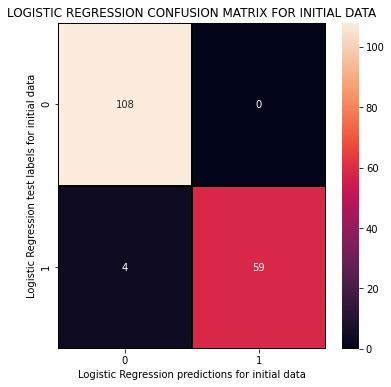

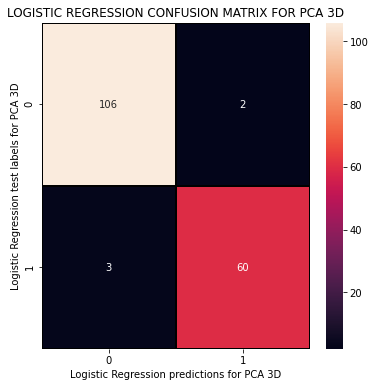

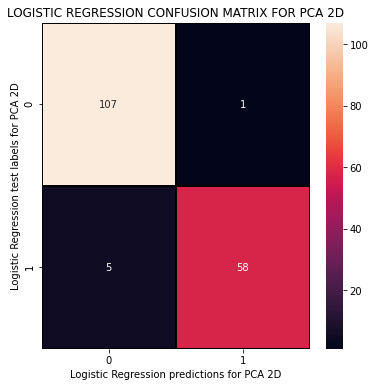

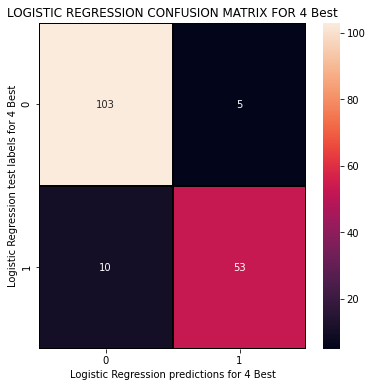

In [19]:
from sklearn.metrics import confusion_matrix
cm_logistic_regression     = confusion_matrix(dfTestLabels, predictions_lr)
cm_logistic_regression_3D  = confusion_matrix(dfTestLabels, predictions_lr_3D)
cm_logistic_regression_2D  = confusion_matrix(dfTestLabels, predictions_lr_2D)
cm_logistic_regression_4B = confusion_matrix(dfTestLabels, predictions_lr_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for initial data")
plt.ylabel("Logistic Regression test labels for initial data")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for PCA 3D")
plt.ylabel("Logistic Regression test labels for PCA 3D")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for PCA 2D")
plt.ylabel("Logistic Regression test labels for PCA 2D")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_logistic_regression_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Logistic Regression predictions for 4 Best")
plt.ylabel("Logistic Regression test labels for 4 Best")
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX FOR 4 Best")
plt.show()

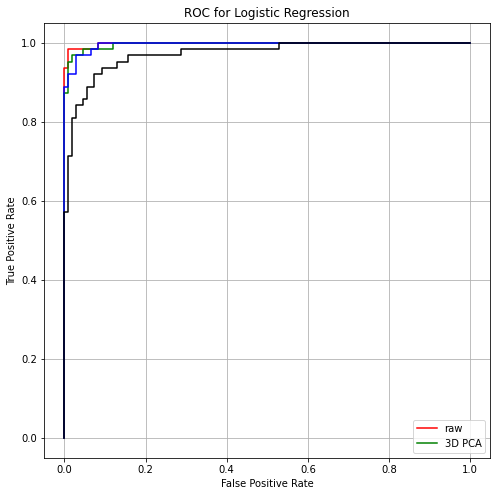

In [20]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_lr,     truePositiveRate_lr,     thresholds_lr     = roc_curve(dfTestLabels, predictions_lr_prob)
falsePositiveRate_lr_3D,  truePositiveRate_lr_3D,  thresholds_lr_3D  = roc_curve(dfTestLabels, predictions_lr_3D_prob)
falsePositiveRate_lr_2D,  truePositiveRate_lr_2D,  thresholds_lr_2D  = roc_curve(dfTestLabels, predictions_lr_2D_prob)
falsePositiveRate_lr_4B, truePositiveRate_lr_4B, thresholds_lr_4B = roc_curve(dfTestLabels, predictions_lr_4B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_lr, truePositiveRate_lr, color='red', label="raw")
plt.plot(falsePositiveRate_lr_3D,  truePositiveRate_lr_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_lr_2D,  truePositiveRate_lr_2D, color='blue', label="")
plt.plot(falsePositiveRate_lr_4B, truePositiveRate_lr_4B, color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend()
plt.grid()

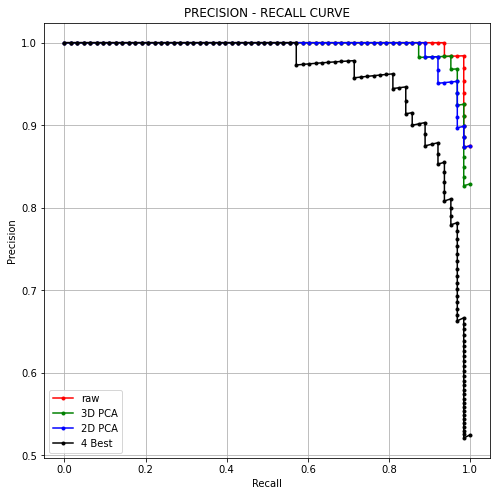

In [21]:
from sklearn.metrics import precision_recall_curve
precision_lr,     recall_lr,     _ = precision_recall_curve(npTestLabels,     predictions_lr_prob)
precision_lr_3D,  recall_lr_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_lr_3D_prob)
precision_lr_2D,  recall_lr_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_lr_2D_prob)
precision_lr_4B, recall_lr_4B, _ = precision_recall_curve(npTestLabels_4B, predictions_lr_4B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_lr,     precision_lr,     marker='.', color="red", label="raw")
plt.plot(recall_lr_3D,  precision_lr_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_lr_2D,  precision_lr_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_lr_4B, precision_lr_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

<h1 style="text-align:center">K-NEAREST NEIGHBOUR (KNN) CLASSIFICATION</h1>
<hr>

<div style="text-align:justify;font-size:17px;">K-Nearest Neighbors (KNN) Classification is used in this project. Same K-NN classification algorithm is used for initial data, 2-dimensional PCA, 3-dimensional PCA and the initial data with 4 Best features. In order to estimate the best value for K, values from 1 to 100 are used for initial data, 2-dimensional PCA, 3-dimensional PCA and data with 4 Best features and their accuracies and mean squared error are compared. When the average of the mean squared error is taken for the 4 different data types it is seen that when K is equal to 7 it gives the smallest error and gives a very high accuracy so K is chosen as 7. Accuracy for 4 different data types when K is between 1 and 10 are printed out for better demonstration.</div>

<br>

<div style="text-align:justify;font-size:17px;">K is chosen as 7, so 7-NN is used for this algorithm and very high accuracies are found for initial data, 2-dimensional PCA, 3-dimensional PCA and the initial data with 4 Best features. When the accuracies are compared, it is observed that 3-dimensional PCA has the highest accuracy, initial data has the second highest, data with 4 Best labels has the third highest and the 2-dimensional PCA has the fourth highest. In addition to accuracy; precision, recall and fscore values for both macro and micro are also calculated. Accuracy is very high so all of them also have very high values.</div>

<br>

<div style="text-align:justify;font-size:17px;">The estimated values for the 4 different data types are displayed on a confusion matrix. For this confusion matrix 171 different cells are used. 108 of them are healthy and 63 of them have disease. When accuracy is calculated for all them they give the same value found in the previous step.</div>

<br>

<div style="text-align:justify;font-size:17px;">By using the true positive, true negative, false positive and false negative values in the confusion matrix, the results are shown in a ROC curve and a precision-recall curve. Initial values are shown by red, 3-dimensional PCA is shown by green, 2-dimensional PCA is shown by blue and the initial data with the 4 Best features is shown by black. By examining the graph, it can be seen that all four of the results have very high accuracy.</div>



In [22]:
# importing the model.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

accurracies_knn     = []
accurracies_3D_knn  = []
accurracies_2D_knn  = []
accurracies_4B_knn = []
mean_squared_error_knn = []
mean_squared_error_2D_knn = []
mean_squared_error_3D_knn = []
mean_squared_error_4B_knn = []

for n_neighbor in range(1,101):
    knn_model     = KNeighborsClassifier(n_neighbors = n_neighbor)
    knn_model_3D  = KNeighborsClassifier(n_neighbors = n_neighbor)
    knn_model_2D  = KNeighborsClassifier(n_neighbors = n_neighbor)
    knn_model_4B = KNeighborsClassifier(n_neighbors = n_neighbor)
    
    knn_model.fit(dfTrainFeatures, dfTrainLabels)
    knn_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
    knn_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
    knn_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
    
    pred_knn = knn_model.predict(dfTestFeatures) 
    pred_2D_knn = knn_model_2D.predict(dfTestFeatures_2D) 
    pred_3D_knn = knn_model_3D.predict(dfTestFeatures_3D) 
    pred_4B_knn = knn_model_4B.predict(dfTestFeatures_4B) 
    
    acc     = knn_model.score(dfTestFeatures, dfTestLabels)
    acc_3D  = knn_model_3D.score(dfTestFeatures_3D,  dfTestLabels_3D)
    acc_2D  = knn_model_2D.score(dfTestFeatures_2D,  dfTestLabels_2D)
    acc_4B = knn_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
    
    mse = mean_squared_error(dfTestLabels,pred_knn,multioutput='raw_values')    
    mse_2D = mean_squared_error(dfTestLabels,pred_2D_knn,multioutput='raw_values')    
    mse_3D = mean_squared_error(dfTestLabels,pred_3D_knn,multioutput='raw_values')
    mse_4B = mean_squared_error(dfTestLabels,pred_4B_knn,multioutput='raw_values')
    
    mean_squared_error_knn.append(mse)
    mean_squared_error_2D_knn.append(mse_2D)
    mean_squared_error_3D_knn.append(mse_3D)
    mean_squared_error_4B_knn.append(mse_4B)
    
    accurracies_knn.append(acc)
    accurracies_3D_knn.append(acc_3D)
    accurracies_2D_knn.append(acc_2D)
    accurracies_4B_knn.append(acc_4B)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed

In [0]:
print('-----------------------------------')
print('-ACURRACY FOR DIFFERENT DATA TYPES-')
print('---ONLY K FROM 1 TO 10 ARE SHOWN---')
print('')

print('-----------------------------------')
print('-----ACURRACY FOR INITIAL DATA-----')
print('-----------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for initial data: ' + str(accurracies_knn[i]))
    
print('-----------------------------------')
print('------ACURRACY FOR PCA 3D DATA-----')
print('-----------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for pca 3D data: ' + str(accurracies_3D_knn[i]))
        
print('-----------------------------------')
print('------ACURRACY FOR PCA 2D DATA-----')
print('-----------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for pca 2D data: ' + str(accurracies_2D_knn[i]))
        
print('------------------------------------')
print('------ACURRACY FOR PCA 4B DATA-----')
print('------------------------------------')

for i in range(10):
        print(str(i+1) + ' nn acurracy for pca 4B data: ' + str(accurracies_4B_knn[i]))

-----------------------------------
-ACURRACY FOR DIFFERENT DATA TYPES-
---ONLY K FROM 1 TO 10 ARE SHOWN---

-----------------------------------
-----ACURRACY FOR INITIAL DATA-----
-----------------------------------
1 nn acurracy for initial data: 0.9590643274853801
2 nn acurracy for initial data: 0.9590643274853801
3 nn acurracy for initial data: 0.9707602339181286
4 nn acurracy for initial data: 0.9766081871345029
5 nn acurracy for initial data: 0.9649122807017544
6 nn acurracy for initial data: 0.9649122807017544
7 nn acurracy for initial data: 0.9649122807017544
8 nn acurracy for initial data: 0.9649122807017544
9 nn acurracy for initial data: 0.9649122807017544
10 nn acurracy for initial data: 0.9649122807017544
-----------------------------------
------ACURRACY FOR PCA 3D DATA-----
-----------------------------------
1 nn acurracy for pca 3D data: 0.9415204678362573
2 nn acurracy for pca 3D data: 0.9590643274853801
3 nn acurracy for pca 3D data: 0.9473684210526315
4 nn acurracy 

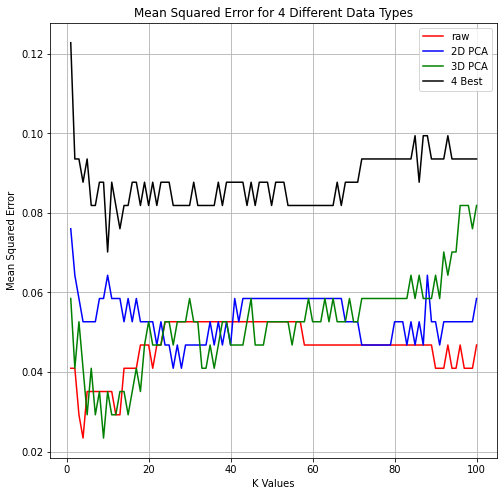

In [23]:
# plotting errors for different k values.
k = [i for i in range(1,101)]
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(k,mean_squared_error_knn,color='red', label="raw")
plt.plot(k,mean_squared_error_2D_knn,color='blue', label="2D PCA")
plt.plot(k,mean_squared_error_3D_knn,color='green', label="3D PCA")
plt.plot(k,mean_squared_error_4B_knn,color='black', label="4 Best")
plt.xlabel('K Values')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for 4 Different Data Types')
plt.legend()
plt.grid()

Best K value for K-NN is: 7


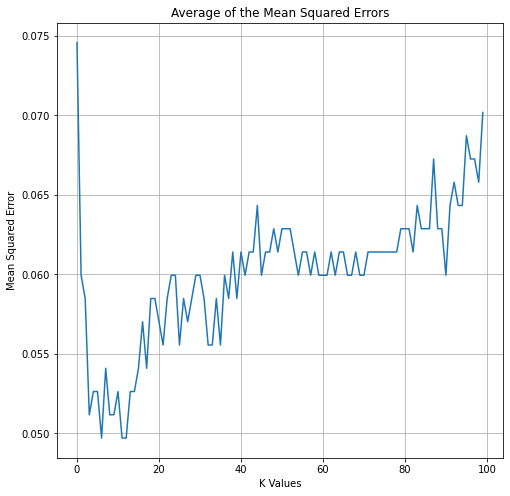

In [24]:
average_mse = []
for i in range(0,100):
    avg = (mean_squared_error_knn[i] + mean_squared_error_2D_knn[i] + mean_squared_error_3D_knn[i] + mean_squared_error_4B_knn[i]) / 4 
    average_mse.append(avg)

#KNN is equal to 7
best_knn = average_mse.index(min(average_mse)) + 1
print('Best K value for K-NN is: ' + str(best_knn))

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(average_mse)
plt.xlabel('K Values')
plt.ylabel('Mean Squared Error')
plt.title('Average of the Mean Squared Errors')
plt.grid()

In [26]:
# applying 7 nn to initial data.
knn_model = KNeighborsClassifier(n_neighbors = best_knn)
knn_model.fit(dfTrainFeatures, dfTrainLabels)
acc_knn = knn_model.score(dfTestFeatures, dfTestLabels)
predictions_knn = knn_model.predict(dfTestFeatures)
predictions_knn_prob = knn_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_knn, macro_recall_knn, macro_fscore_knn, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn, average='macro')
micro_precision_knn, micro_recall_knn, micro_fscore_knn, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn, average='micro')


# applying 7 nn to PCA 3D data.
knn_model_3D = KNeighborsClassifier(n_neighbors = best_knn)
knn_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acc_knn_3D = knn_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_knn_3D = knn_model_3D.predict(dfTestFeatures_3D)
predictions_knn_3D_prob = knn_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_knn_3D, macro_recall_knn_3D, macro_fscore_knn_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_3D, average='macro')
micro_precision_knn_3D, micro_recall_knn_3D, micro_fscore_knn_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_3D, average='micro')


# applying 7 nn to PCA 2D data.
knn_model_2D = KNeighborsClassifier(n_neighbors = best_knn)
knn_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acc_knn_2D = knn_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_knn_2D = knn_model_2D.predict(dfTestFeatures_2D)
predictions_knn_2D_prob = knn_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_knn_2D, macro_recall_knn_2D, macro_fscore_knn_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_2D, average='macro')
micro_precision_knn_2D, micro_recall_knn_2D, micro_fscore_knn_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_2D, average='micro')


# applying 7 nn to PCA 4 Best data.
knn_model_4B = KNeighborsClassifier(n_neighbors = best_knn)
knn_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
acc_knn_4B = knn_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
predictions_knn_4B = knn_model_4B.predict(dfTestFeatures_4B)
predictions_knn_4B_prob = knn_model_4B.predict_proba(dfTestFeatures_4B)[:,1]
macro_precision_knn_4B, macro_recall_knn_4B, macro_fscore_knn_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_4B, average='macro')
micro_precision_knn_4B, micro_recall_knn_4B, micro_fscore_knn_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_knn_4B, average='micro')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [27]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA     : ' + str(acc_knn))
print('ACURRACY FOR PCA (2DIMENSION) : ' + str(acc_knn_3D))
print('ACURRACY FOR PCA (3DIMENSION) : ' + str(acc_knn_2D))
print('ACURRACY FOR (4 Best FEAT.)  : ' + str(acc_knn_4B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_knn))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_knn_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_knn_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_knn_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_knn))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_knn_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_knn_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_knn_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_knn))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_knn_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_knn_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_knn_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_knn))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_knn_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_knn_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_knn_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_knn))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_knn_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_knn_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_knn_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_knn))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_knn_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_knn_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_knn_4B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA     : 0.9649122807017544
ACURRACY FOR PCA (2DIMENSION) : 0.9707602339181286
ACURRACY FOR PCA (3DIMENSION) : 0.9473684210526315
ACURRACY FOR (4 Best FEAT.)  : 0.9181286549707602
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.965424739195231
MACRO PRECISION PCA (2DIMENSION): 0.9448061556673573
MACRO PRECISION PCA (3DIMENSION): 0.9778761061946903
MACRO PRECISION (4 Best FEA.)  : 0.912037037037037
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9589947089947091
MACRO RECALL PCA (2DIMENSION): 0.9417989417989417
MACRO RECALL PCA (3DIMENSION): 0.9603174603174602
MACRO RECALL (4 Best FEA.)  : 0.912037037037037
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.962044983722995
MACRO FSCORE PCA (2DIMENSION): 0.9432626728110599
MACRO FSCORE PCA (3DIMENSION): 0.9680266257806365
MACRO FSCORE (4 Best 

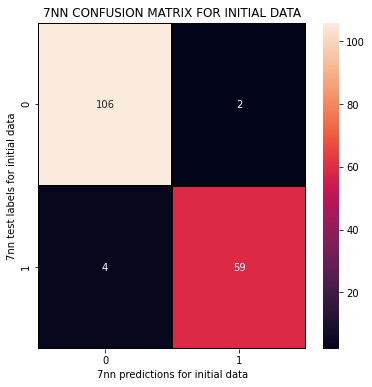

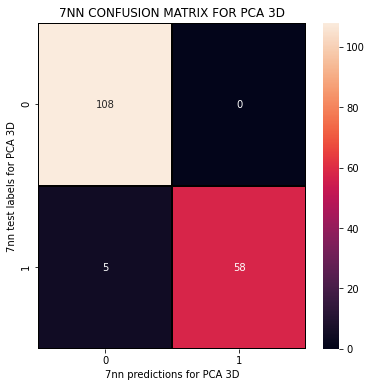

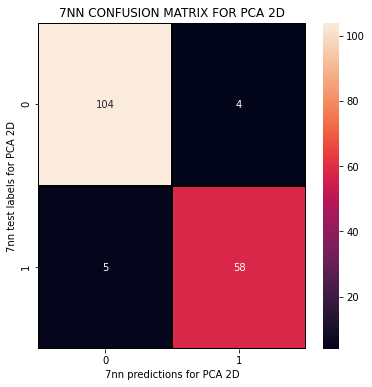

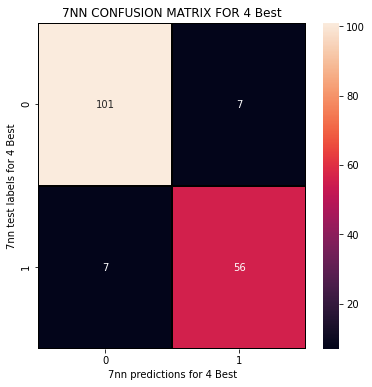

In [29]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_7nn     = confusion_matrix(dfTestLabels, predictions_knn)
cm_7nn_3D  = confusion_matrix(dfTestLabels, predictions_knn_3D)
cm_7nn_2D  = confusion_matrix(dfTestLabels, predictions_knn_2D)
cm_7nn_4B = confusion_matrix(dfTestLabels, predictions_knn_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for initial data")
plt.ylabel("7nn test labels for initial data")
plt.title("7NN CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for PCA 3D")
plt.ylabel("7nn test labels for PCA 3D")
plt.title("7NN CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for PCA 2D")
plt.ylabel("7nn test labels for PCA 2D")
plt.title("7NN CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_7nn_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("7nn predictions for 4 Best")
plt.ylabel("7nn test labels for 4 Best")
plt.title("7NN CONFUSION MATRIX FOR 4 Best")
plt.show()

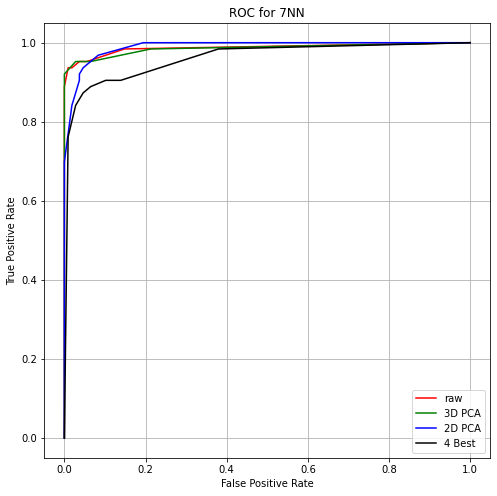

In [30]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_knn,     truePositiveRate_knn,     thresholds_knn     = roc_curve(dfTestLabels, predictions_knn_prob)
falsePositiveRate_knn_3D,  truePositiveRate_knn_3D,  thresholds_knn_3D  = roc_curve(dfTestLabels, predictions_knn_3D_prob)
falsePositiveRate_knn_2D,  truePositiveRate_knn_2D,  thresholds_knn_2D  = roc_curve(dfTestLabels, predictions_knn_2D_prob)
falsePositiveRate_knn_4B, truePositiveRate_knn_4B, thresholds_knn_4B = roc_curve(dfTestLabels, predictions_knn_4B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_knn,     truePositiveRate_knn,     color='red',   label="raw")
plt.plot(falsePositiveRate_knn_3D,  truePositiveRate_knn_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_knn_2D,  truePositiveRate_knn_2D,  color='blue',  label="2D PCA")
plt.plot(falsePositiveRate_knn_4B, truePositiveRate_knn_4B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 7NN')
plt.legend()
plt.grid()

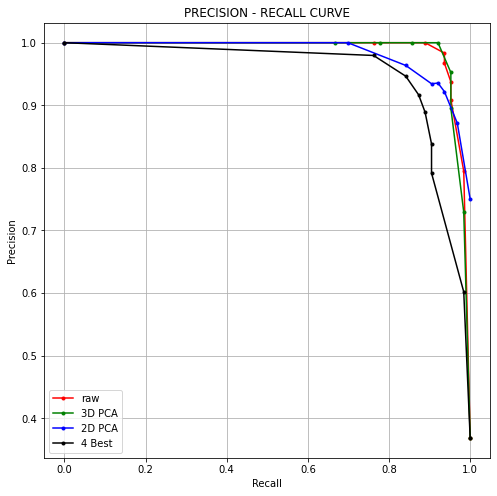

In [31]:
from sklearn.metrics import precision_recall_curve
precision_knn,     recall_knn,     _ = precision_recall_curve(npTestLabels,     predictions_knn_prob)
precision_knn_3D,  recall_knn_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_knn_3D_prob)
precision_knn_2D,  recall_knn_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_knn_2D_prob)
precision_knn_4B, recall_knn_4B, _ = precision_recall_curve(npTestLabels_4B, predictions_knn_4B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_knn,     precision_knn,     marker='.', color="red", label="raw")
plt.plot(recall_knn_3D,  precision_knn_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_knn_2D,  precision_knn_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_knn_4B, precision_knn_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

<h3 style="text-align:center">SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION</h3>
<hr>

<div style="text-align:justify;font-size:17px;">We first import the SVC library sklearn.svm. SVM is a classifier that separates clusters clusters of data via a plane (or a hyperplane for higher dimensions). As in the aforementioned algorithms, we fit initial dataset to the model. And then use that model to perform predictions on our test set. This process is repeated a further two times on 2D PCA and 3D PCA data. Then there accuracies, confusion matrices and ROC curves are calculated as below:</div>



In [32]:
# importing the model.
from sklearn.svm import SVC

# applying svm to initial data.
svm_model = SVC(random_state = 1)
svm_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_svm = svm_model.score(dfTestFeatures, dfTestLabels)
predictions_svm = svm_model.predict(dfTestFeatures)
macro_precision_svm, macro_recall_svm, macro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm, average='macro')
micro_precision_svm, micro_recall_svm, micro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm, average='micro')

# applying svm to PCA data that has 3 dimensions.
svm_model_3D = SVC(random_state = 1)
svm_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_3D_svm = svm_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_svm_3D = svm_model_3D.predict(dfTestFeatures_3D)
macro_precision_svm_3D, macro_recall_svm_3D, macro_fscore_svm_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_3D, average='macro')
micro_precision_svm_3D, micro_recall_svm_3D, micro_fscore_svm_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_3D, average='micro')

# applying svm to PCA data that has 2 dimensions.
svm_model_2D = SVC(random_state = 1)
svm_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_2D_svm = svm_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_svm_2D = svm_model_2D.predict(dfTestFeatures_2D)
macro_precision_svm_2D, macro_recall_svm_2D, macro_fscore_svm_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_2D, average='macro')
micro_precision_svm_2D, micro_recall_svm_2D, micro_fscore_svm_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_2D, average='micro')

# applying svm to data that has 4 Best Features
svm_model_4B = SVC(random_state = 1)
svm_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
acurracy_4B_svm = svm_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
predictions_svm_4B = svm_model_4B.predict(dfTestFeatures_4B)
macro_precision_svm_4B, macro_recall_svm_4B, macro_fscore_svm_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_4B, average='macro')
micro_precision_svm_4B, micro_recall_svm_4B, micro_fscore_svm_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_svm_4B, average='micro')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [33]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_svm))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_3D_svm))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_2D_svm))
print('ACURRACY FOR (4 Best FEAT.) : ' + str(acurracy_4B_svm))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_svm))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_svm_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_svm_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_svm_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_svm))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_svm_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_svm_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_svm_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_svm))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_svm_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_svm_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_svm_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_svm))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_svm_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_svm_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_svm_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_svm))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_svm_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_svm_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_svm_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_svm))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_svm_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_svm_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_svm_4B))
print('------------------------------------------------------')


------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9824561403508771
ACURRACY FOR PCA (2DIMENSION): 0.9707602339181286
ACURRACY FOR PCA (3DIMENSION): 0.9415204678362573
ACURRACY FOR (4 Best FEAT.) : 0.9239766081871345
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9827611719443623
MACRO PRECISION PCA (2DIMENSION): 0.9399403874813711
MACRO PRECISION PCA (3DIMENSION): 0.9701094998520272
MACRO PRECISION (4 Best FEA.)  : 0.9256942325297528
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9794973544973544
MACRO RECALL PCA (2DIMENSION): 0.9338624338624338
MACRO RECALL PCA (3DIMENSION): 0.966931216931217
MACRO RECALL (4 Best FEA.)  : 0.91005291005291
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9810875576036866
MACRO FSCORE PCA (2DIMENSION): 0.936741639538325
MACRO FSCORE PCA (3DIMENSION): 0.9684792626728111
MACRO FSCORE (4 Best FEA.

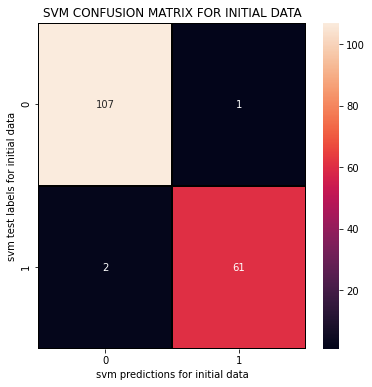

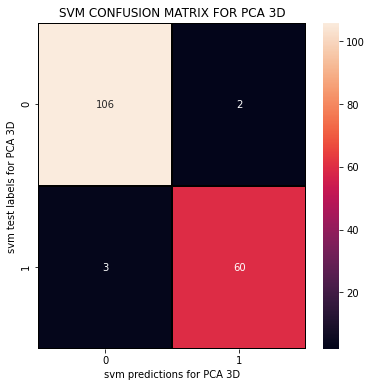

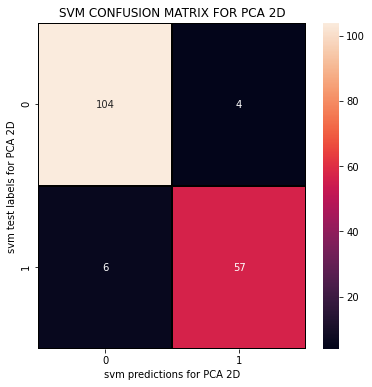

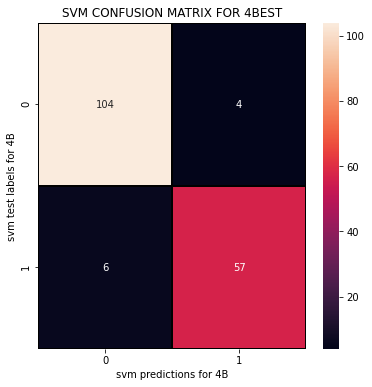

In [34]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_svm     = confusion_matrix(dfTestLabels, predictions_svm)
cm_svm_3D  = confusion_matrix(dfTestLabels, predictions_svm_3D)
cm_svm_2D  = confusion_matrix(dfTestLabels, predictions_svm_2D)
cm_svm_4B = confusion_matrix(dfTestLabels, predictions_svm_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for initial data")
plt.ylabel("svm test labels for initial data")
plt.title("SVM CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for PCA 3D")
plt.ylabel("svm test labels for PCA 3D")
plt.title("SVM CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for PCA 2D")
plt.ylabel("svm test labels for PCA 2D")
plt.title("SVM CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_svm_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("svm predictions for 4B")
plt.ylabel("svm test labels for 4B")
plt.title("SVM CONFUSION MATRIX FOR 4BEST")
plt.show()


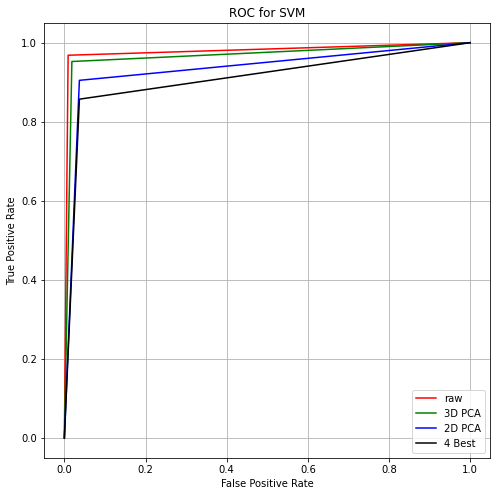

In [35]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_svm,     truePositiveRate_svm,     thresholds_svm     = roc_curve(dfTestLabels, predictions_svm)
falsePositiveRate_svm_3D,  truePositiveRate_svm_3D,  thresholds_svm_3D  = roc_curve(dfTestLabels, predictions_svm_3D)
falsePositiveRate_svm_2D,  truePositiveRate_svm_2D,  thresholds_svm_2D  = roc_curve(dfTestLabels, predictions_svm_2D)
falsePositiveRate_svm_4B, truePositiveRate_svm_4B, thresholds_svm_4B = roc_curve(dfTestLabels, predictions_svm_4B)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_svm,     truePositiveRate_svm,     color='red', label="raw")
plt.plot(falsePositiveRate_svm_3D,  truePositiveRate_svm_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_svm_2D,  truePositiveRate_svm_2D,  color='blue', label="2D PCA")
plt.plot(falsePositiveRate_svm_4B, truePositiveRate_svm_4B, color='black', label="4 Best")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend()
plt.grid()

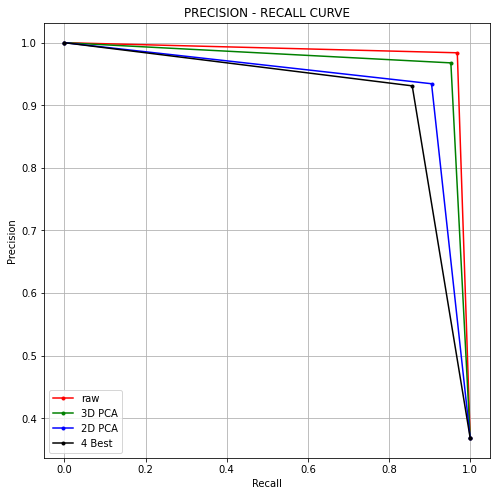

In [36]:
from sklearn.metrics import precision_recall_curve
precision_svm,     recall_svm,     _ = precision_recall_curve(npTestLabels,     predictions_svm)
precision_svm_3D,  recall_svm_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_svm_3D)
precision_svm_2D,  recall_svm_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_svm_2D)
precision_svm_4B, recall_svm_4B, _ = precision_recall_curve(npTestLabels_4B, predictions_svm_4B)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_svm,     precision_svm,     marker='.', color="red", label="raw")
plt.plot(recall_svm_3D,  precision_svm_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_svm_2D,  precision_svm_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_svm_4B, precision_svm_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [37]:
# importing the model.
from sklearn.svm import SVC
import math
import numpy as np

#trying the model with different gamma values
gammaValues = np.array([
        math.pow(2, -4), 
        math.pow(2, -3), 
        math.pow(2, -2), 
        math.pow(2,  0), 
        math.pow(2,  1)
    ])

acurracy_svm_arr = []
acurracy_svm2D_arr = []
acurracy_svm3D_arr = []
acurracy_svm10_arr = []

macro_precision_svm_arr = []
macro_precision_svm2D_arr = []
macro_precision_svm3D_arr = []
macro_precision_svm10_arr = []

macro_recall_svm_arr = []
macro_recall_svm2D_arr = []
macro_recall_svm3D_arr = []
macro_recall_svm10_arr = []

micro_precision_svm_arr = []
micro_precision_svm2D_arr = []
micro_precision_svm3D_arr = []
micro_precision_svm10_arr = []

micro_recall_svm_arr = []
micro_recall_svm2D_arr = []
micro_recall_svm3D_arr = []
micro_recall_svm10_arr = []

# applying svm to initial data for different gamma values.
count=0
for x in gammaValues: 
    
    # constructing the SVM model for different gamma values.
    svm_model = SVC(random_state = 1, gamma=x)
    svm_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_svm = svm_model.score(dfTestFeatures, dfTestLabels)
    macro_precision_svm, macro_recall_svm, macro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, svm_model.predict(dfTestFeatures), average='macro')
    micro_precision_svm, micro_recall_svm, micro_fscore_svm, _ = precision_recall_fscore_support(dfTestLabels, svm_model.predict(dfTestFeatures), average='micro')
    
    #COPYING VALUES TO THEIR ARRAYS
    acurracy_svm_arr = np.append(acurracy_svm_arr,acurracy_svm)
    macro_precision_svm_arr = np.append(macro_precision_svm_arr,macro_precision_svm)
    macro_recall_svm_arr = np.append(macro_recall_svm_arr,macro_recall_svm)
    micro_precision_svm_arr = np.append(micro_precision_svm_arr,micro_precision_svm)
    micro_recall_svm_arr = np.append(micro_recall_svm_arr,micro_recall_svm)
    
    # applying svm to PCA data that has 3 dimensions.
    svm_model_3D = SVC(random_state = 1, gamma=x)
    svm_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
    acurracy_3D_svm = svm_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
    macro_precision_svm_3D, macro_recall_svm_3D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_3D.predict(dfTestFeatures_3D), average='macro')
    micro_precision_svm_3D, micro_recall_svm_3D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_3D.predict(dfTestFeatures_3D), average='micro')
    
    #COPYING VLUES TO THEIR ARRAYS 3D
    acurracy_svm3D_arr = np.append(acurracy_svm3D_arr,acurracy_3D_svm)
    macro_precision_svm3D_arr = np.append(macro_precision_svm3D_arr,macro_precision_svm_3D)
    macro_recall_svm3D_arr = np.append(macro_recall_svm3D_arr,macro_recall_svm_3D)
    micro_precision_svm3D_arr = np.append(micro_precision_svm3D_arr,micro_precision_svm_3D)
    micro_recall_svm3D_arr = np.append(micro_recall_svm3D_arr,micro_recall_svm_3D)
    
    # applying svm to PCA data that has 2 dimensions.
    svm_model_2D = SVC(random_state = 1,gamma=x)
    svm_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
    acurracy_2D_svm = svm_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
    macro_precision_svm_2D, macro_recall_svm_2D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_2D.predict(dfTestFeatures_2D), average='macro')
    micro_precision_svm_2D, micro_recall_svm_2D, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_2D.predict(dfTestFeatures_2D), average='micro')
    
    #COPYING VLUES TO THEIR ARRAYS 2D
    acurracy_svm2D_arr = np.append(acurracy_svm2D_arr,acurracy_2D_svm)
    macro_precision_svm2D_arr = np.append(macro_precision_svm2D_arr,macro_precision_svm_2D)
    macro_recall_svm2D_arr = np.append(macro_recall_svm2D_arr,macro_recall_svm_2D)
    micro_precision_svm2D_arr = np.append(micro_precision_svm2D_arr,micro_precision_svm_2D)
    micro_recall_svm2D_arr = np.append(micro_recall_svm2D_arr,micro_recall_svm_2D)
    
    # applying svm to data that has 4 Best Features
    svm_model_4B = SVC(random_state = 1, gamma=x)
    svm_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
    acurracy_4B_svm = svm_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
    macro_precision_svm_4B, macro_recall_svm_4B, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_4B.predict(dfTestFeatures_4B), average='macro')
    micro_precision_svm_4B, micro_recall_svm_4B, __, _ = precision_recall_fscore_support(dfTestLabels, svm_model_4B.predict(dfTestFeatures_4B), average='micro')
    
    #COPYING VLUES TO THEIR ARRAYS 10
    acurracy_svm10_arr = np.append(acurracy_svm10_arr,acurracy_4B_svm)
    macro_precision_svm10_arr = np.append(macro_precision_svm10_arr,macro_precision_svm_4B)
    macro_recall_svm10_arr = np.append(macro_recall_svm10_arr,macro_recall_svm_4B)
    micro_precision_svm10_arr = np.append(micro_precision_svm10_arr,micro_precision_svm_4B)
    micro_recall_svm10_arr = np.append(micro_recall_svm10_arr,micro_recall_svm_4B)
    count += 1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [38]:
print("------------------------------------------------------------------------------------")
print("ACRRACIES RAW: " + str(acurracy_svm_arr))
print("ACRRACIES 3D : " + str(acurracy_svm3D_arr))
print("ACRRACIES 2D : " + str(acurracy_svm2D_arr))
print("ACRRACIES 4B: " + str(acurracy_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MACRO PRECISION RAW: " + str(macro_precision_svm_arr))
print("MACRO PRECISION 3D : " + str(macro_precision_svm2D_arr))
print("MACRO PRECISION 2D : " + str(macro_precision_svm3D_arr))
print("MACRO PRECISION 4B: " + str(macro_precision_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MACRO RECALL RAW: " + str(macro_recall_svm_arr))
print("MACRO RECALL 3D : " + str(macro_recall_svm2D_arr))
print("MACRO RECALL 2D : " + str(macro_recall_svm3D_arr))
print("MACRO RECALL 4B: " + str(macro_recall_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MICRO PRECISION RAW: " + str(micro_precision_svm_arr))
print("MICRO PRECISION 3D : " + str(micro_precision_svm2D_arr))
print("MICRO PRECISION 2D : " + str(micro_precision_svm3D_arr))
print("MICRO PRECISION 4B: " + str(micro_precision_svm10_arr))
print("------------------------------------------------------------------------------------")
print("MICRO RECALL RAW: " + str(micro_recall_svm_arr))
print("MICRO RECALL 3D : " + str(micro_recall_svm2D_arr))
print("MICRO RECALL 2D : " + str(micro_recall_svm3D_arr))
print("MICRO RECALL 4B: " + str(micro_recall_svm10_arr))
print("------------------------------------------------------------------------------------")

------------------------------------------------------------------------------------
ACRRACIES RAW: [0.95321637 0.95906433 0.97660819 0.98245614 0.97660819]
ACRRACIES 3D : [0.97076023 0.97660819 0.97660819 0.95321637 0.95906433]
ACRRACIES 2D : [0.95906433 0.94152047 0.94152047 0.94152047 0.94736842]
ACRRACIES 4B: [0.91812865 0.9122807  0.9122807  0.9122807  0.92397661]
------------------------------------------------------------------------------------
MACRO PRECISION RAW: [0.96052632 0.96483064 0.97816692 0.98276117 0.97486772]
MACRO PRECISION 3D : [0.96956522 0.94332627 0.93994039 0.93994039 0.94480616]
MACRO PRECISION 2D : [0.9701095  0.97816692 0.97816692 0.94973545 0.95745783]
MACRO PRECISION 4B: [0.92105263 0.91264876 0.90945946 0.90945946 0.92569423]
------------------------------------------------------------------------------------
MACRO RECALL RAW: [0.93981481 0.94775132 0.97156085 0.97949735 0.97486772]
MACRO RECALL 3D : [0.94444444 0.93055556 0.93386243 0.93386243 0.9417989

ValueError: ignored

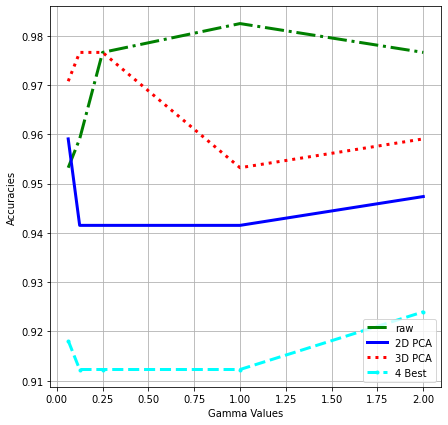

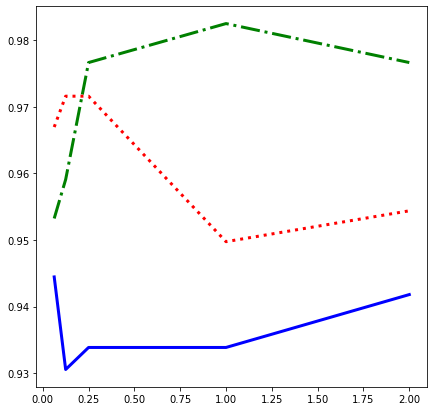

In [39]:
f, ax = plt.subplots(figsize = (7, 7))
plt.plot(gammaValues, acurracy_svm_arr, '-.',color='green', linewidth=3, label='raw')
plt.plot(gammaValues, acurracy_svm2D_arr,'-',color='blue', linewidth=3, label='2D PCA')
plt.plot(gammaValues, acurracy_svm3D_arr,':' ,color='red', linewidth=3, label='3D PCA')
plt.plot(gammaValues, acurracy_svm10_arr,'r--.', color='cyan', linewidth=3, label='4 Best')
plt.xlabel('Gamma Values')
plt.ylabel('Accuracies')
plt.legend()
plt.grid()

f, ax = plt.subplots(figsize = (7, 7))
plt.plot(gammaValues, micro_recall_svm_arr,'-.',color='green', linewidth=3, label='raw')
plt.plot(gammaValues, macro_recall_svm2D_arr,'-',color='blue', linewidth=3, label='2D PCA')
plt.plot(gammaValues, macro_recall_svm3D_arr,':' ,color='red', linewidth=3, label='3D PCA')
plt.plot(gammaValues, macro_recall_svm10_arr,'r---.', color='cyan', linewidth=3, label='4 Best')
plt.xlabel('Gamma Values')
plt.ylabel('Macro Recall Values')
plt.legend()
plt.grid()

f, ax = plt.subplots(figsize = (7, 7))
plt.plot(gammaValues, micro_precision_svm_arr,'-.',color='green', linewidth=3, label='raw')
plt.plot(gammaValues, macro_precision_svm2D_arr,'-',color='blue', linewidth=3, label='2D PCA')
plt.plot(gammaValues, macro_precision_svm3D_arr,':' ,color='red', linewidth=3, label='3D PCA')
plt.plot(gammaValues, macro_precision_svm10_arr,'r---.', color='cyan', linewidth=3, label='4 Best')
plt.xlabel('Gamma Values')
plt.ylabel('Macro Precision Values')
plt.legend()
plt.grid()

Note that the values for macro precision and macro  recall are close together because the different gamma values can only make very slight changes to the already very accurate algorithm and the dataset is straight forward.

<h2 style="text-align:center">DECISSION TREE CLASSIFICATION</h2>
<hr>

<div style="text-align:justify;font-size:17px;">We import the DecisionTreeClassifier library from sklearn.tree. That classifies the label for each feature and then continues doing so in a linear and consequent manner for other features. Then the final classification for the final feature is our prediction. Same as for other algorithms, we fit our data to the model and then perform our predictions using this model on our test labels. The results for these are given below:</div> 
<br>






In [0]:
# importing the model.
from sklearn.tree import DecisionTreeClassifier

# applying Decision Tree Classification to initial data.
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_dt = decision_tree_model.score(dfTestFeatures, dfTestLabels)
predictions_dt = decision_tree_model.predict(dfTestFeatures)
predictions_dt_prob = decision_tree_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_dt, macro_recall_dt, macro_fscore_dt, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt, average='macro')
micro_precision_dt, micro_recall_dt, micro_fscore_dt, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt, average='micro')

# applying Decision Tree Classification to PCA data that has 3 dimensions.
decision_tree_model_3D = DecisionTreeClassifier()
decision_tree_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_dt_3D = decision_tree_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_dt_3D = decision_tree_model_3D.predict(dfTestFeatures_3D)
predictions_dt_3D_prob = decision_tree_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_dt_3D, macro_recall_dt_3D, macro_fscore_dt_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_3D, average='macro')
micro_precision_dt_3D, micro_recall_dt_3D, micro_fscore_dt_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_3D, average='micro')

# applying Decision Tree Classification to PCA data that has 2 dimensions.
decision_tree_model_2D = DecisionTreeClassifier()
decision_tree_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_dt_2D = decision_tree_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_dt_2D = decision_tree_model_2D.predict(dfTestFeatures_2D)
predictions_dt_2D_prob = decision_tree_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_dt_2D, macro_recall_dt_2D, macro_fscore_dt_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_2D, average='macro')
micro_precision_dt_2D, micro_recall_dt_2D, micro_fscore_dt_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_2D, average='micro')

# applying Decision Tree Classification to data that has 4 Best Features.
decision_tree_model_4B = DecisionTreeClassifier()
decision_tree_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
acurracy_dt_4B = decision_tree_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
predictions_dt_4B = decision_tree_model_2D.predict(dfTestFeatures_2D)
predictions_dt_4B_prob = decision_tree_model_4B.predict_proba(dfTestFeatures_4B)[:,1]
macro_precision_dt_4B, macro_recall_dt_4B, macro_fscore_dt_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_4B, average='macro')
micro_precision_dt_4B, micro_recall_dt_4B, micro_fscore_dt_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_dt_4B, average='micro')


In [41]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_dt))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_dt_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_dt_2D))
print('ACURRACY FOR (4 Best FEAT.) : ' + str(acurracy_dt_4B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_dt))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_dt_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_dt_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_dt_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_dt))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_dt_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_dt_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_dt_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_dt))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_dt_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_dt_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_dt_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_dt))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_dt_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_dt_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_dt_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_dt))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_dt_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_dt_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_dt_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_dt))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_dt_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_dt_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_dt_4B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9415204678362573
ACURRACY FOR PCA (3DIMENSION): 0.9532163742690059
ACURRACY FOR PCA (2DIMENSION): 0.9298245614035088
ACURRACY FOR (4 Best FEAT.) : 0.9122807017543859
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9322250639386189
MACRO PRECISION PCA (2DIMENSION): 0.9246031746031746
MACRO PRECISION PCA (3DIMENSION): 0.952682563338301
MACRO PRECISION (4 Best FEA.)  : 0.9246031746031746
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9470899470899471
MACRO RECALL PCA (2DIMENSION): 0.9246031746031746
MACRO RECALL PCA (3DIMENSION): 0.9464285714285714
MACRO RECALL (4 Best FEA.)  : 0.9246031746031746
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9383116883116883
MACRO FSCORE PCA (2DIMENSION): 0.9246031746031746
MACRO FSCORE PCA (3DIMENSION): 0.9493933116306599
MACRO FSCORE (4 Best F

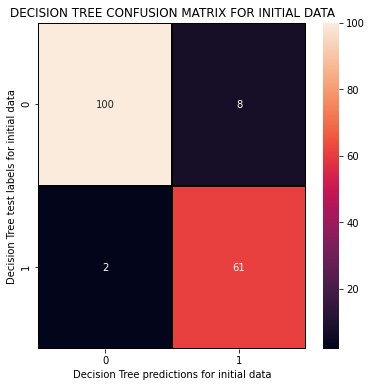

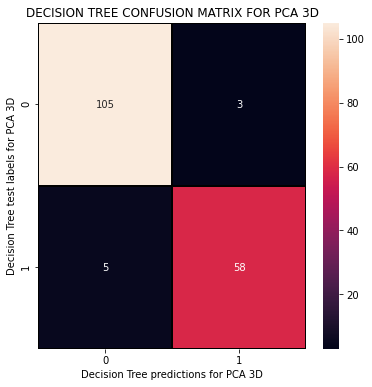

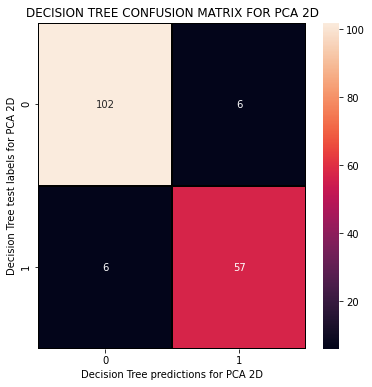

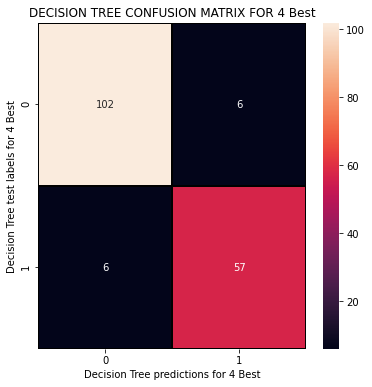

In [43]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_decision_tree     = confusion_matrix(dfTestLabels, predictions_dt)
cm_decision_tree_3D  = confusion_matrix(dfTestLabels, predictions_dt_3D)
cm_decision_tree_2D  = confusion_matrix(dfTestLabels, predictions_dt_2D)
cm_decision_tree_4B = confusion_matrix(dfTestLabels, predictions_dt_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for initial data")
plt.ylabel("Decision Tree test labels for initial data")
plt.title("DECISION TREE CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for PCA 3D")
plt.ylabel("Decision Tree test labels for PCA 3D")
plt.title("DECISION TREE CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for PCA 2D")
plt.ylabel("Decision Tree test labels for PCA 2D")
plt.title("DECISION TREE CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_decision_tree_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Decision Tree predictions for 4 Best")
plt.ylabel("Decision Tree test labels for 4 Best")
plt.title("DECISION TREE CONFUSION MATRIX FOR 4 Best")
plt.show()


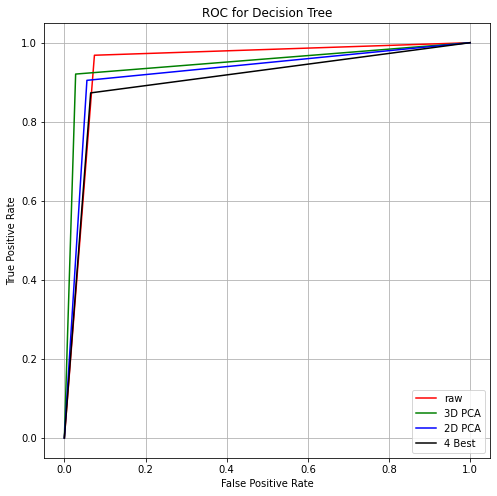

In [44]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_dt,     truePositiveRate_dt,     thresholds_dt     = roc_curve(dfTestLabels, predictions_dt_prob)
falsePositiveRate_dt_3D,  truePositiveRate_dt_3D,  thresholds_dt_3D  = roc_curve(dfTestLabels, predictions_dt_3D_prob)
falsePositiveRate_dt_2D,  truePositiveRate_dt_2D,  thresholds_dt_2D  = roc_curve(dfTestLabels, predictions_dt_2D_prob)
falsePositiveRate_dt_4B, truePositiveRate_dt_4B, thresholds_dt_4B = roc_curve(dfTestLabels, predictions_dt_4B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_dt, truePositiveRate_dt, color='red', label="raw")
plt.plot(falsePositiveRate_dt_3D, truePositiveRate_dt_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_dt_2D, truePositiveRate_dt_2D, color='blue', label="2D PCA")
plt.plot(falsePositiveRate_dt_4B, truePositiveRate_dt_4B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend()
plt.grid()

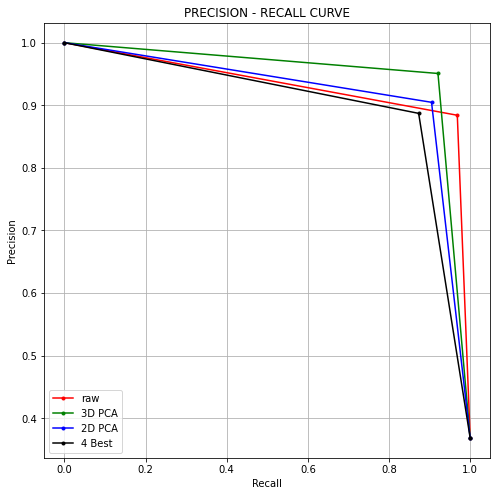

In [45]:
from sklearn.metrics import precision_recall_curve
precision_dt,     recall_dt,     _ = precision_recall_curve(npTestLabels,     predictions_dt_prob)
precision_dt_3D,  recall_dt_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_dt_3D_prob)
precision_dt_2D,  recall_dt_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_dt_2D_prob)
precision_dt_4B, recall_dt_4B, _ = precision_recall_curve(npTestLabels_4B, predictions_dt_4B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_dt,     precision_dt,     marker='.', color="red", label="raw")
plt.plot(recall_dt_3D,  precision_dt_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_dt_2D,  precision_dt_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_dt_4B, precision_dt_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

<h3>Accuracy of Desicion Tree Model for Different Values of Parameters</h3>
<h4>Maximum Depth</h4>
<div style="text-align:justify;font-size:17px;">This parameter is used to define the how deep the tree can go as its names implies. As the tree goes deeper it generates more branches and learns more information from the data. Fort this analysis, tree depth of from 1 to 7 is used and train data and test data accuracy is plotted to see how much model learns for different tree depths and how is the accuracy of test data for different values fort his parameter. </div> 
<br>
<div style="text-align:justify;font-size:17px;">As it can be seen from the figure, as tree depth increases model learns the data more and more and eventually overfits. For the accuracy of test data, firstly it increases as models learn more about the dataset then it decreases due to overfitting.</div>

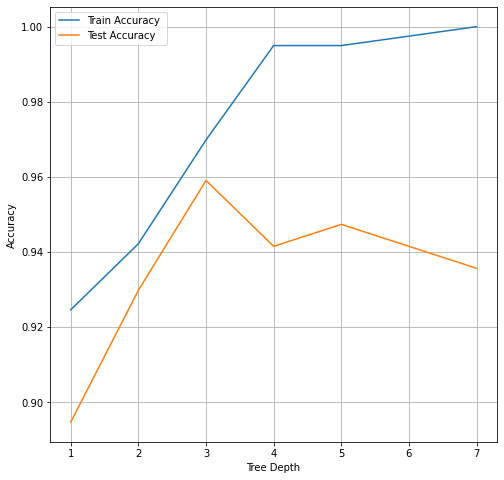

In [46]:
# Changing the parameters and comparing the accuracies

# Tree Depth Parameter
train_acc = []
test_acc = []

for i in range(1,8):
    decision_tree_model = DecisionTreeClassifier(max_depth=i)
    decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_dt_FS = decision_tree_model.score(dfTestFeatures, dfTestLabels)
    acurracy_dt_FS_train = decision_tree_model.score(dfTrainFeatures, dfTrainLabels)
    train_acc.append(acurracy_dt_FS_train)
    test_acc.append(acurracy_dt_FS)

# plotting the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(np.linspace(1,7, 7, endpoint=True),train_acc,label= "Train Accuracy ")
plt.plot(np.linspace(1,7, 7, endpoint=True),test_acc,label = "Test Accuracy")
plt.legend(loc='upper left')
plt.ylabel("Accuracy")
plt.xlabel("Tree Depth")
plt.grid()

<h4>Minimum Samples Split </h4>
<div style="text-align:justify;font-size:17px;">This Minimum Samples Split parameter is used to arrange the minimum amount of samples to split internal nodes. As this can take account only one sample for all nodes, it can also take account all samples for each one of nodes. As the value of this parameter is increased the model gets more stiffed since it has to take account more and more samples for each nodes. For this analysis parameter value of from 10% to 100% is used. </div> 
<br>
<div style="text-align:justify;font-size:17px;">As it can be seen from the figure as we increase the value and force the model to take account more and more samples for each nodes, it starts to underfit the data.</div>

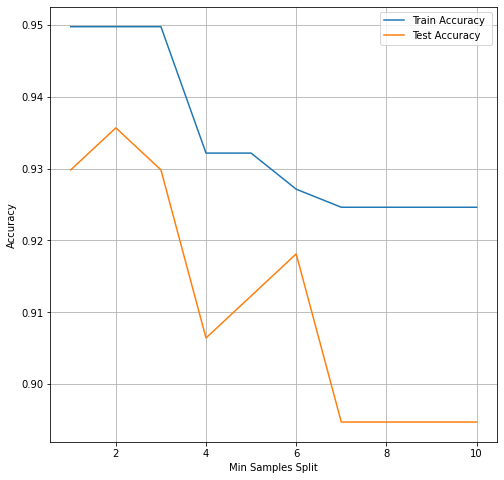

In [47]:
# Min Samples Split Parameter
train_acc = []
test_acc = []
Arr = np.linspace(0.1,1,10)

for i in Arr:
    decision_tree_model = DecisionTreeClassifier(min_samples_split=i)
    decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_dt_FS = decision_tree_model.score(dfTestFeatures, dfTestLabels)
    acurracy_dt_FS_train = decision_tree_model.score(dfTrainFeatures, dfTrainLabels)
    train_acc.append(acurracy_dt_FS_train)
    test_acc.append(acurracy_dt_FS)

# plotting the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(np.linspace(1,10, 10, endpoint=True),train_acc,label= "Train Accuracy ")
plt.plot(np.linspace(1,10, 10, endpoint=True),test_acc,label = "Test Accuracy")
plt.legend(loc='upper right')
plt.ylabel("Accuracy")
plt.xlabel("Min Samples Split")
plt.grid()

<h4>Minimum Samples Leaf</h4>
<div style="text-align:justify;font-size:17px;">This parameter is used to define the minimum number of samples necessary for a leaf node. </div> 
<br>
<div style="text-align:justify;font-size:17px;">This one is also really similiar to previous parameter. As it can be seen from the figure, increasing the value of this parameter causes underfitting.</div>

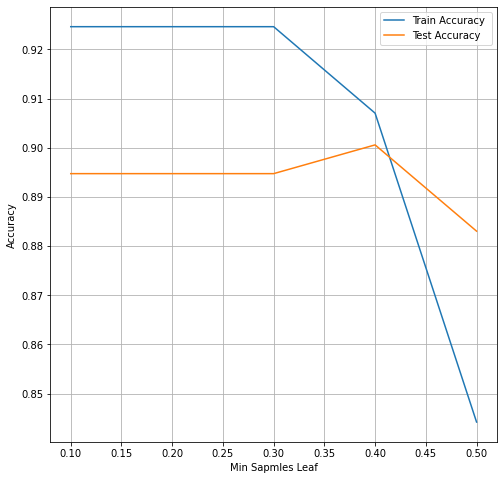

In [48]:
# Minimum Samples Leaf Parameter
train_acc = []
test_acc = []
Arr = np.linspace(0.1, 0.5, 5)

for i in Arr:
    decision_tree_model = DecisionTreeClassifier(min_samples_leaf=i)
    decision_tree_model.fit(dfTrainFeatures, dfTrainLabels)
    acurracy_dt_FS = decision_tree_model.score(dfTestFeatures, dfTestLabels)
    acurracy_dt_FS_train = decision_tree_model.score(dfTrainFeatures, dfTrainLabels)
    train_acc.append(acurracy_dt_FS_train)
    test_acc.append(acurracy_dt_FS)

# plotting the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(np.linspace(0.1,0.5, 5, endpoint=True),train_acc,label= "Train Accuracy ")
plt.plot(np.linspace(0.1,0.5, 5, endpoint=True),test_acc,label = "Test Accuracy")
plt.legend(loc='upper right')
plt.ylabel("Accuracy")
plt.xlabel("Min Sapmles Leaf")
plt.grid()

<h2 style="text-align:center">RANDOM FOREST CLASSIFICATION</h2>

<hr>

<div style="text-align:justify;font-size:17px;"> In this part Random Forest Classification is used for processing the data. Decision trees created in the previous part are used in this classificaiton. RandomForestClassifier is imported from sklearn.ensamble and it is used for classifying the initial raw data, 2-dimensional PCA, 3-dimensional PCA and the initial data with 4 Best features. Number of estimators are chosen as 100 in order to get good results. </div> 

<br>

<div style="text-align:justify;font-size:17px;"> Accuracy, precision, recall and fscore are calculated for both macro and micro by using Random Forest Classification. Their values are very high. The estimated values for the 4 different data types are displayed on a confusion matrix. For this confusion matrix 171 different cells are used. 108 of them are healthy and 63 of them have disease. The estimated values for the 4 different data types are displayed on a confusion matrix. For this confusion matrix 171 different cells are used. 108 of them are healthy and 63 of them have disease.</div>

<br>

<div style="text-align:justify;font-size:17px;">By using the true positive, true negative, false positive and false negative values in the confusion matrix, the results are shown in ROC curve and precision-recall curve. In the curves, initial values are shown by red, 3-dimensional PCA is shown by green, 2-dimensional PCA is shown by blue and initial data with 4 Best features is shown by black. By examining the curves, it can be seen that Random Forest Classification is very effective. </div>
 
<br>

In [49]:
# importing the model.
from sklearn.ensemble import RandomForestClassifier

# applying Random Forest Classification to initial data.
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_rf = rf_model.score(dfTestFeatures, dfTestLabels)
predictions_rf = rf_model.predict(dfTestFeatures)
predictions_rf_prob = rf_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_rf, macro_recall_rf, macro_fscore_rf, _ = precision_recall_fscore_support(dfTestLabels, predictions_rf, average='macro')
micro_precision_rf, micro_recall_rf, micro_fscore_rf, _ = precision_recall_fscore_support(dfTestLabels, predictions_rf, average='micro')

# applying Random Forest Classification to PCA data that has 3 dimensions.
rf_model_3D = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_rf_3D = rf_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_rf_3D = rf_model_3D.predict(dfTestFeatures_3D)
predictions_rf_3D_prob = rf_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_rf_3D, macro_recall_rf_3D, macro_fscore_rf_3D, _ = precision_recall_fscore_support(dfTestLabels_3D, predictions_rf_3D, average='macro')
micro_precision_rf_3D, micro_recall_rf_3D, micro_fscore_rf_3D, _ = precision_recall_fscore_support(dfTestLabels_3D, predictions_rf_3D, average='micro')

# applying Random Forest Classification to PCA data that has 2 dimensions.
rf_model_2D = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_rf_2D = rf_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_rf_2D = rf_model_2D.predict(dfTestFeatures_2D)
predictions_rf_2D_prob = rf_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_rf_2D, macro_recall_rf_2D, macro_fscore_rf_2D, _ = precision_recall_fscore_support(dfTestLabels_2D, predictions_rf_2D, average='macro')
micro_precision_rf_2D, micro_recall_rf_2D, micro_fscore_rf_2D, _ = precision_recall_fscore_support(dfTestLabels_2D, predictions_rf_2D, average='micro')

# applying Random Forest Classification to data that has 4 Best Features.
rf_model_4B = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
acurracy_rf_4B = rf_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
predictions_rf_4B = rf_model_4B.predict(dfTestFeatures_4B)
predictions_rf_4B_prob = rf_model_4B.predict_proba(dfTestFeatures_4B)[:,1]
macro_precision_rf_4B, macro_recall_rf_4B, macro_fscore_rf_4B, _ = precision_recall_fscore_support(dfTestLabels_4B, predictions_rf_4B, average='macro')
micro_precision_rf_4B, micro_recall_rf_4B, micro_fscore_rf_4B, _ = precision_recall_fscore_support(dfTestLabels_4B, predictions_rf_4B, average='micro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [50]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_rf))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_rf_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_rf_2D))
print('ACURRACY FOR (4 Best FEAT.) : ' + str(acurracy_rf_4B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_rf))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_rf_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_rf_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_rf_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_rf))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_rf_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_rf_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_rf_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_rf))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_rf_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_rf_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_rf_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_rf))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_rf_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_rf_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_rf_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_rf))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_rf_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_rf_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_rf_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_rf))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_rf_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_rf_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_rf_4B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9707602339181286
ACURRACY FOR PCA (3DIMENSION): 0.9590643274853801
ACURRACY FOR PCA (2DIMENSION): 0.9649122807017544
ACURRACY FOR (4 Best FEAT.) : 0.9181286549707602
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9736486486486486
MACRO PRECISION PCA (2DIMENSION): 0.969203995157385
MACRO PRECISION PCA (3DIMENSION): 0.9574578277596922
MACRO PRECISION (4 Best FEA.)  : 0.9144560357675111
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9636243386243386
MACRO RECALL PCA (2DIMENSION): 0.9556878306878307
MACRO RECALL PCA (3DIMENSION): 0.9543650793650793
MACRO RECALL (4 Best FEA.)  : 0.9087301587301587
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9682592716338123
MACRO FSCORE PCA (2DIMENSION): 0.9617734724292102
MACRO FSCORE PCA (3DIMENSION): 0.9558709677419355
MACRO FSCORE (4 Best F

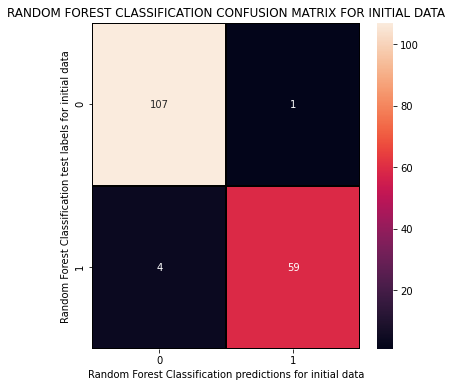

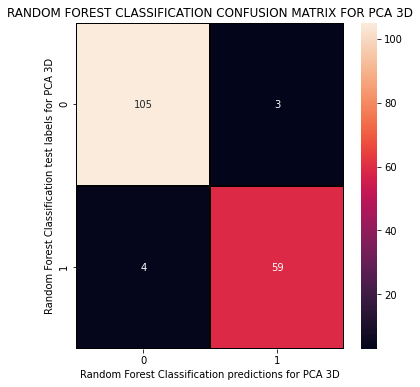

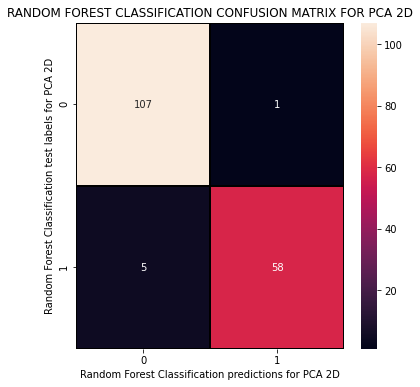

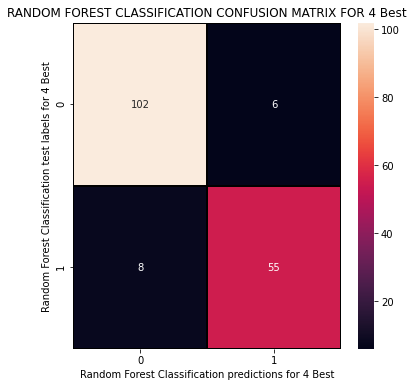

In [51]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_rf     = confusion_matrix(dfTestLabels, predictions_rf)
cm_rf_3D  = confusion_matrix(dfTestLabels, predictions_rf_3D)
cm_rf_2D  = confusion_matrix(dfTestLabels, predictions_rf_2D)
cm_rf_4B = confusion_matrix(dfTestLabels, predictions_rf_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for initial data")
plt.ylabel("Random Forest Classification test labels for initial data")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for PCA 3D")
plt.ylabel("Random Forest Classification test labels for PCA 3D")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for PCA 2D")
plt.ylabel("Random Forest Classification test labels for PCA 2D")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_rf_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Random Forest Classification predictions for 4 Best")
plt.ylabel("Random Forest Classification test labels for 4 Best")
plt.title("RANDOM FOREST CLASSIFICATION CONFUSION MATRIX FOR 4 Best")
plt.show()

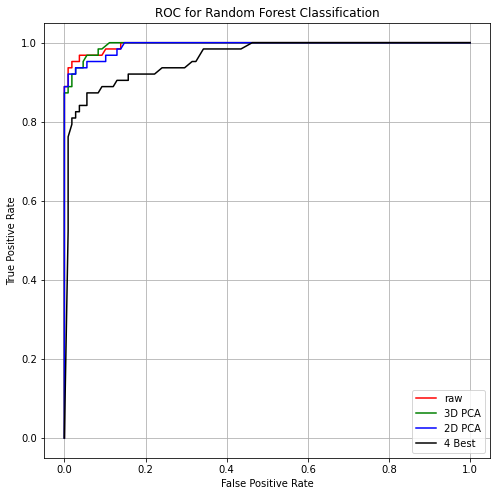

In [52]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_rf,     truePositiveRate_rf,     thresholds_rf     = roc_curve(dfTestLabels, predictions_rf_prob)
falsePositiveRate_rf_3D,  truePositiveRate_rf_3D,  thresholds_rf_3D  = roc_curve(dfTestLabels, predictions_rf_3D_prob)
falsePositiveRate_rf_2D,  truePositiveRate_rf_2D,  thresholds_rf_2D  = roc_curve(dfTestLabels, predictions_rf_2D_prob)
falsePositiveRate_rf_4B, truePositiveRate_rf_4B, thresholds_rf_4B = roc_curve(dfTestLabels, predictions_rf_4B_prob)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_rf, truePositiveRate_rf, color='red', label="raw")
plt.plot(falsePositiveRate_rf_3D, truePositiveRate_rf_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_rf_2D, truePositiveRate_rf_2D, color='blue', label="2D PCA")
plt.plot(falsePositiveRate_rf_4B, truePositiveRate_rf_4B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest Classification')
plt.legend()
plt.grid()

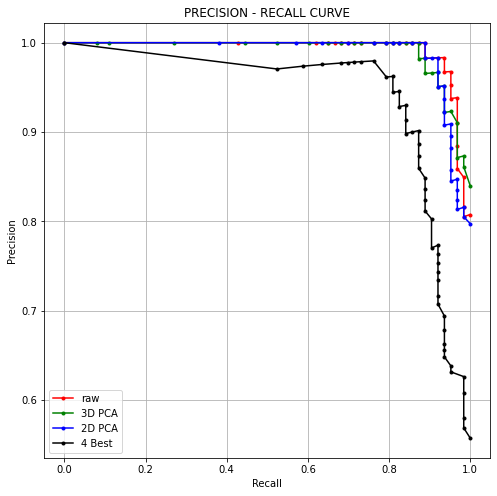

In [53]:
from sklearn.metrics import precision_recall_curve
precision_rf,     recall_rf,     _ = precision_recall_curve(npTestLabels,     predictions_rf_prob)
precision_rf_3D,  recall_rf_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_rf_3D_prob)
precision_rf_2D,  recall_rf_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_rf_2D_prob)
precision_rf_4B, recall_rf_4B, _ = precision_recall_curve(npTestLabels_4B, predictions_rf_4B_prob)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_rf,     precision_rf,     marker='.', color="red", label="raw")
plt.plot(recall_rf_3D,  precision_rf_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_rf_2D,  precision_rf_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_rf_4B, precision_rf_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

<h3 style="text-align:center;">NAIVE BAYES CLASSIFICATION</h3>
<hr>

<h4 >MULTINOMIAL MODEL</h4>
<hr>

<div style="text-align:justify;font-size:17px;">We import the MultinomialNB library from sklearn.naive_bayes. Naive bayes is a classifier that treats all instances of feature to be independent from each other. Which in nature is “Naive” assumption but despite this fact, it is still commonly used as a classifier due to its accuracy. For this algorithm, we only use our initial data and best 4 features. Results are printed out and shown in Confusion Matrix, ROC curve and precision-recall curve. The accuracy for both of them is lower than the other classifiers. The accuracy for the inital data has higher accuracy compared to accuracy for best 4 features. </div>


In [54]:
from sklearn.naive_bayes import MultinomialNB

# applying Naive Bayes Classification to initial data.
naive_bayes_mult_model = MultinomialNB()
naive_bayes_mult_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_nb_mult = naive_bayes_mult_model.score(dfTestFeatures, dfTestLabels)
predictions_nb_mult = naive_bayes_mult_model.predict(dfTestFeatures)
predictions_nb_mult_prob = naive_bayes_mult_model.predict_proba(dfTestFeatures)[:,1]

# applying Naive Bayes Classification to 4 Best Data.
naive_bayes_mult_model_4B = MultinomialNB()
naive_bayes_mult_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
acurracy_nb_mult_4B = naive_bayes_mult_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
predictions_nb_mult_4B = naive_bayes_mult_model_4B.predict(dfTestFeatures_4B)
predictions_nb_mult_prob_4B = naive_bayes_mult_model_4B.predict_proba(dfTestFeatures_4B)[:,1]

# printing the results.
print('ACURRACY FOR INITIAL DATA : ' + str(acurracy_nb_mult))
print('ACURRACY FOR 4 Best DATA : ' + str(acurracy_nb_mult_4B))

ACURRACY FOR INITIAL DATA : 0.8304093567251462
ACURRACY FOR 4 Best DATA : 0.631578947368421


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


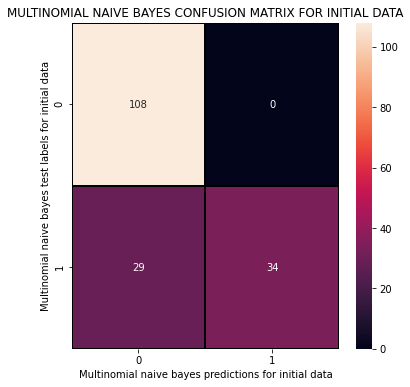

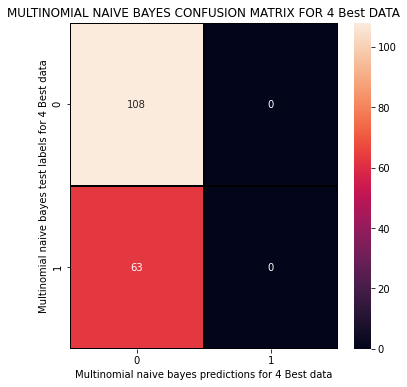

In [55]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_nb_mult     = confusion_matrix(dfTestLabels, predictions_nb_mult)
cm_nb_mult_4B = confusion_matrix(dfTestLabels, predictions_nb_mult_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_mult, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Multinomial naive bayes predictions for initial data")
plt.ylabel("Multinomial naive bayes test labels for initial data")
plt.title("MULTINOMIAL NAIVE BAYES CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_mult_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Multinomial naive bayes predictions for 4 Best data")
plt.ylabel("Multinomial naive bayes test labels for 4 Best data")
plt.title("MULTINOMIAL NAIVE BAYES CONFUSION MATRIX FOR 4 Best DATA")
plt.show()

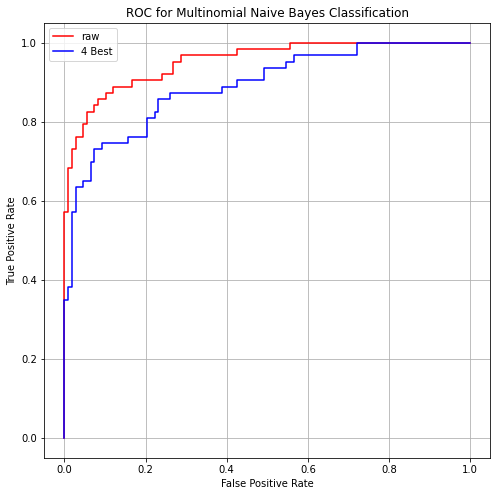

In [56]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_nb_mult, truePositiveRate_nb_mult, thresholds_nb_mult = roc_curve(dfTestLabels, predictions_nb_mult_prob)
falsePositiveRate_nb_mult_4B, truePositiveRate_nb_mult_4B, thresholds_nb_mult_4B = roc_curve(dfTestLabels, predictions_nb_mult_prob_4B)

# drawing the graph 
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_nb_mult, truePositiveRate_nb_mult, color='red', label="raw")
plt.plot(falsePositiveRate_nb_mult_4B, truePositiveRate_nb_mult_4B, color='blue', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multinomial Naive Bayes Classification')
plt.legend()
plt.grid()

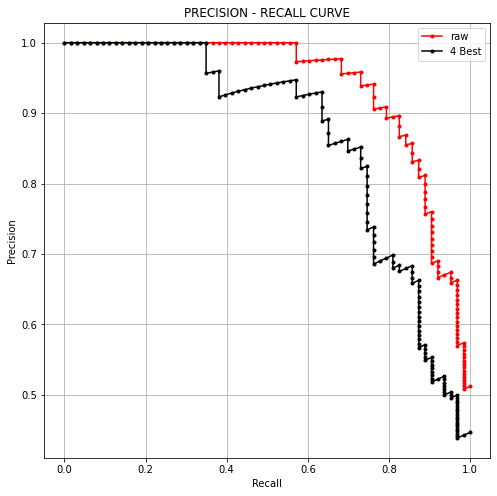

In [57]:
from sklearn.metrics import precision_recall_curve
precision_nb_mult,     recall_nb_mult,     _ = precision_recall_curve(npTestLabels,     predictions_nb_mult_prob)
precision_nb_mult_4B, recall_nb_mult_4B, _ = precision_recall_curve(npTestLabels_4B, predictions_nb_mult_prob_4B)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_nb_mult,     precision_nb_mult,     marker='.', color="red", label="raw")
plt.plot(recall_nb_mult_4B, precision_nb_mult_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

<h4>GAUSSIAN MODEL</h4>
<hr>
<div style="text-align:justify;font-size:17px;">However, the negative instances in the PCA data did not allow a multinomial classifier to fit to it. Therefore, we used a Gaussian model for them. All for 4 data types are used in this part. Results are printed out and shown in Confusion Matrix, ROC curve and precision-recall curve. Accuracy for both of them are higher than the Multinomial Model and close to other classifiers.</div>


In [58]:
from sklearn.naive_bayes import GaussianNB

# applying Naive Bayes Gaussian Classification to initial data.
naive_bayes_gaus_model = GaussianNB()
naive_bayes_gaus_model.fit(dfTrainFeatures, dfTrainLabels)
acurracy_nb_gaus = naive_bayes_gaus_model.score(dfTestFeatures, dfTestLabels)
predictions_nb_gaus = naive_bayes_gaus_model.predict(dfTestFeatures)
predictions_nb_gaus_prob = naive_bayes_gaus_model.predict_proba(dfTestFeatures)[:,1]
macro_precision_nb_gaus, macro_recall_nb_gaus, macro_fscore_nb_gaus, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus, average='macro')
micro_precision_nb_gaus, micro_recall_nb_gaus, micro_fscore_nb_gaus, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus, average='micro')


# applying Naive Bayes Gaussian Classification to PCA 3D data.
naive_bayes_gaus_model_3D = GaussianNB()
naive_bayes_gaus_model_3D.fit(dfTrainFeatures_3D, dfTrainLabels_3D)
acurracy_nb_gaus_3D = naive_bayes_gaus_model_3D.score(dfTestFeatures_3D, dfTestLabels_3D)
predictions_nb_gaus_3D = naive_bayes_gaus_model_3D.predict(dfTestFeatures_3D)
predictions_nb_gaus_prob_3D = naive_bayes_gaus_model_3D.predict_proba(dfTestFeatures_3D)[:,1]
macro_precision_nb_gaus_3D, macro_recall_nb_gaus_3D, macro_fscore_nb_gaus_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_3D, average='macro')
micro_precision_nb_gaus_3D, micro_recall_nb_gaus_3D, micro_fscore_nb_gaus_3D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_3D, average='micro')


# applying Naive Bayes Gaussian Classification to PCA 2D data.
naive_bayes_gaus_model_2D = GaussianNB()
naive_bayes_gaus_model_2D.fit(dfTrainFeatures_2D, dfTrainLabels_2D)
acurracy_nb_gaus_2D = naive_bayes_gaus_model_2D.score(dfTestFeatures_2D, dfTestLabels_2D)
predictions_nb_gaus_2D = naive_bayes_gaus_model_2D.predict(dfTestFeatures_2D)
predictions_nb_gaus_prob_2D = naive_bayes_gaus_model_2D.predict_proba(dfTestFeatures_2D)[:,1]
macro_precision_nb_gaus_2D, macro_recall_nb_gaus_2D, macro_fscore_nb_gaus_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_2D, average='macro')
micro_precision_nb_gaus_2D, micro_recall_nb_gaus_2D, micro_fscore_nb_gaus_2D, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_2D, average='micro')


# applying Naive Bayes Gaussian Classification to 4 Best Data.
naive_bayes_gaus_model_4B = GaussianNB()
naive_bayes_gaus_model_4B.fit(dfTrainFeatures_4B, dfTrainLabels_4B)
acurracy_nb_gaus_4B = naive_bayes_gaus_model_4B.score(dfTestFeatures_4B, dfTestLabels_4B)
predictions_nb_gaus_4B = naive_bayes_gaus_model_4B.predict(dfTestFeatures_4B)
predictions_nb_gaus_prob_4B = naive_bayes_gaus_model_4B.predict_proba(dfTestFeatures_4B)[:,1]
macro_precision_nb_gaus_4B, macro_recall_nb_gaus_4B, macro_fscore_nb_gaus_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_4B, average='macro')
micro_precision_nb_gaus_4B, micro_recall_nb_gaus_4B, micro_fscore_nb_gaus_4B, _ = precision_recall_fscore_support(dfTestLabels, predictions_nb_gaus_4B, average='micro')


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [59]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_nb_gaus))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_nb_gaus_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_nb_gaus_2D))
print('ACURRACY FOR 4 Best FEATURES: ' + str(acurracy_nb_gaus_4B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_nb_gaus))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_nb_gaus_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_nb_gaus_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_nb_gaus_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_nb_gaus))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_nb_gaus_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_nb_gaus_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_nb_gaus_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_nb_gaus))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_nb_gaus_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_nb_gaus_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_nb_gaus_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_nb_gaus))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_nb_gaus_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_nb_gaus_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_nb_gaus_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_nb_gaus))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_nb_gaus_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_nb_gaus_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_nb_gaus_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_nb_gaus))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_nb_gaus_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_nb_gaus_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_nb_gaus_4B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.935672514619883
ACURRACY FOR PCA (3DIMENSION): 0.935672514619883
ACURRACY FOR PCA (2DIMENSION): 0.9298245614035088
ACURRACY FOR 4 Best FEATURES: 0.9181286549707602
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9321544835750222
MACRO PRECISION PCA (2DIMENSION): 0.9271982116244412
MACRO PRECISION PCA (3DIMENSION): 0.9351351351351351
MACRO PRECISION (4 Best FEA.)  : 0.912037037037037
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9292328042328042
MACRO RECALL PCA (2DIMENSION): 0.9212962962962963
MACRO RECALL PCA (3DIMENSION): 0.9259259259259258
MACRO RECALL (4 Best FEA.)  : 0.912037037037037
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9306543778801843
MACRO FSCORE PCA (2DIMENSION): 0.9240899674459899
MACRO FSCORE PCA (3DIMENSION): 0.9301703975943869
MACRO FSCORE (4 Best FEA.

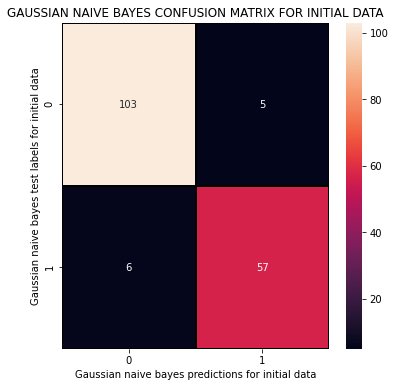

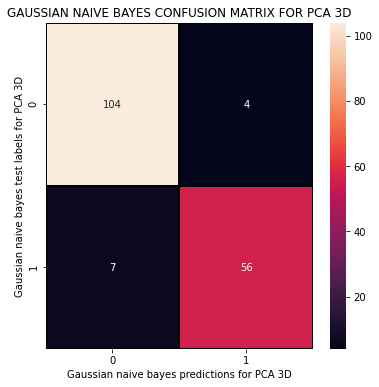

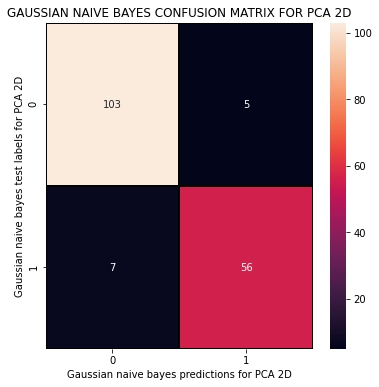

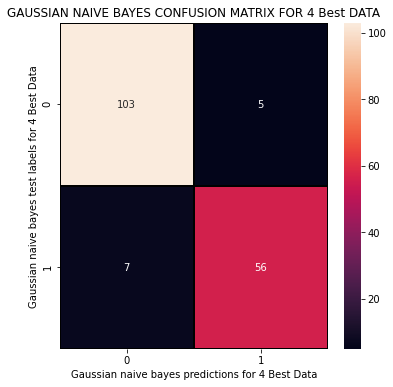

In [60]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_nb_gaussian     = confusion_matrix(dfTestLabels, predictions_nb_gaus)
cm_nb_gaussian_3D  = confusion_matrix(dfTestLabels, predictions_nb_gaus_3D)
cm_nb_gaussian_2D  = confusion_matrix(dfTestLabels, predictions_nb_gaus_2D)
cm_nb_gaussian_4B = confusion_matrix(dfTestLabels, predictions_nb_gaus_2D)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for initial data")
plt.ylabel("Gaussian naive bayes test labels for initial data")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for PCA 3D")
plt.ylabel("Gaussian naive bayes test labels for PCA 3D")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for PCA 2D")
plt.ylabel("Gaussian naive bayes test labels for PCA 2D")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_nb_gaussian_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("Gaussian naive bayes predictions for 4 Best Data")
plt.ylabel("Gaussian naive bayes test labels for 4 Best Data")
plt.title("GAUSSIAN NAIVE BAYES CONFUSION MATRIX FOR 4 Best DATA")
plt.show()


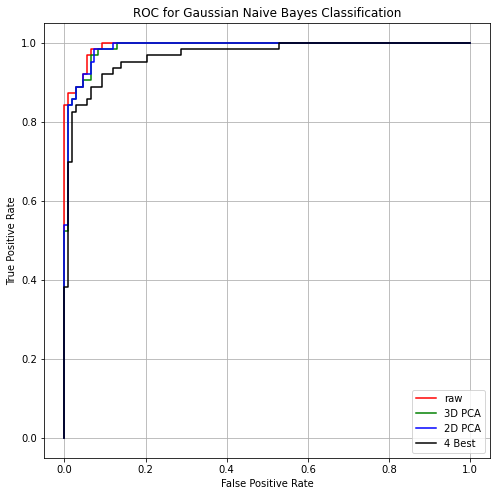

In [61]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_nb_gaus,     truePositiveRate_nb_gaus,     thresholds_nb_gaus     = roc_curve(dfTestLabels, predictions_nb_gaus_prob)
falsePositiveRate_nb_gaus_3D,  truePositiveRate_nb_gaus_3D,  thresholds_nb_gaus_3D  = roc_curve(dfTestLabels, predictions_nb_gaus_prob_3D)
falsePositiveRate_nb_gaus_2D,  truePositiveRate_nb_gaus_2D,  thresholds_nb_gaus_2D  = roc_curve(dfTestLabels, predictions_nb_gaus_prob_2D)
falsePositiveRate_nb_gaus_4B, truePositiveRate_nb_gaus_4B, thresholds_nb_gaus_4B = roc_curve(dfTestLabels, predictions_nb_gaus_prob_4B)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_nb_gaus, truePositiveRate_nb_gaus, color='red', label="raw")
plt.plot(falsePositiveRate_nb_gaus_3D,  truePositiveRate_nb_gaus_3D, color='green', label="3D PCA")
plt.plot(falsePositiveRate_nb_gaus_2D,  truePositiveRate_nb_gaus_2D, color='blue', label="2D PCA")
plt.plot(falsePositiveRate_nb_gaus_4B, truePositiveRate_nb_gaus_4B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gaussian Naive Bayes Classification')
plt.legend()
plt.grid()

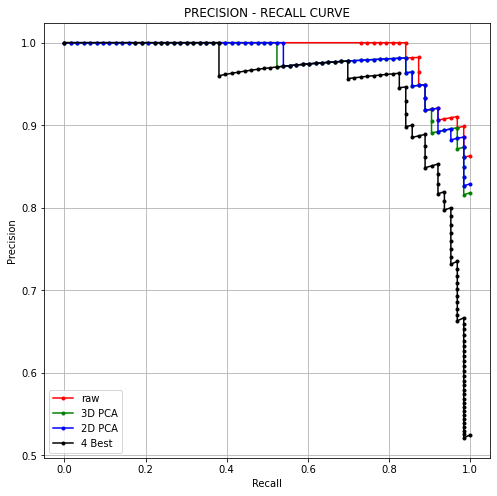

In [62]:
from sklearn.metrics import precision_recall_curve
precision_nb_gaus,     recall_nb_gaus,     _ = precision_recall_curve(npTestLabels,     predictions_nb_gaus_prob)
precision_nb_gaus_3D,  recall_nb_gaus_3D,  _ = precision_recall_curve(npTestLabels_3D,  predictions_nb_gaus_prob_3D)
precision_nb_gaus_2D,  recall_nb_gaus_2D,  _ = precision_recall_curve(npTestLabels_2D,  predictions_nb_gaus_prob_2D)
precision_nb_gaus_4B, recall_nb_gaus_4B, _ = precision_recall_curve(npTestLabels_4B, predictions_nb_gaus_prob_4B)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_nb_gaus,     precision_nb_gaus,     marker='.', color="red", label="raw")
plt.plot(recall_nb_gaus_3D,  precision_nb_gaus_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_nb_gaus_2D,  precision_nb_gaus_2D,  marker='.', color="blue", label="2D PCA")
plt.plot(recall_nb_gaus_4B, precision_nb_gaus_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

<h2 style="text-align:center">ANN CLASSIFICATION</h2>
<hr>

<div style="text-align:justify;font-size:17px;">Artificial neural networks is a mthod in Data Science that enables to make classification by having multiple nodes. These nodes are single neural nets and they are constructing the layers of the network. Each single neural net has its own weights and by doing forward and backward propagation, the weights are adjusting themselves to the training dataset. We used pytorch and created two models. One of them has 5 nodes with 1 hidden layer and the other has 10 nodes with 2 hidden layer. By doing 1000 epochs, our weights adjusted to the dataset and predictions were made. Predictions were compared with the real dataset and their acurracy, precisions, recalls and fscores were printed out and reported. We repeated this process for 2D PCA and 3D PCA and 4 Best features training dataset.</div>

In [0]:
def getAcurracy(predictions, labels):
    truePositives = np.sum( np.logical_and( labels, predictions) )
    falsePositives = np.sum( np.logical_and( np.logical_not(labels), predictions) ) 
    falseNegatives = np.sum( np.logical_and( labels, np.logical_not(predictions)) ) 
    trueNegatives  = np.sum( np.logical_and( np.logical_not(labels), np.logical_not(predictions)) )
    acurracy = (truePositives + trueNegatives) / (truePositives + falsePositives + falseNegatives + trueNegatives)
    return acurracy

In [0]:
# creating the model for 
# ANN with 1 hidden layer
class ANNModel_1Hidden(nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super().__init__()
        self.model1 = nn.Linear(inputSize, hiddenSize)
        self.model2 = nn.Linear(hiddenSize, outputSize)
  
    def propagateForward(self, x):
        y_head1 = torch.sigmoid( self.model1(x) )
        y_head2 = torch.sigmoid( self.model2(y_head1) )
        return y_head2      
  
    def predictTests(self, xTest):
        predictions = self.propagateForward(xTest)
    
        for i in range(predictions.shape[0]):
            if (predictions[i] > 0.5):
                predictions[i] = 1
            else:
                predictions[i] = 0

        return predictions
    
    def predictTestsProba(self, xTest):
        return self.propagateForward(xTest)
    

In [0]:
ann_model_1hidden     = ANNModel_1Hidden(30, 5, 1)
ann_model_1hidden_2D  = ANNModel_1Hidden( 2, 5, 1)
ann_model_1hidden_3D  = ANNModel_1Hidden( 3, 5, 1)
ann_model_1hidden_4B = ANNModel_1Hidden(4,  5,1)
criterion = nn.BCELoss()
optimizer_1hidden = torch.optim.Adam(ann_model_1hidden.parameters(), lr=0.01)
optimizer_1hidden_3D  = torch.optim.Adam(ann_model_1hidden_3D.parameters(),  lr=0.01)
optimizer_1hidden_2D  = torch.optim.Adam(ann_model_1hidden_2D.parameters(),  lr=0.01)
optimizer_1hidden_4B = torch.optim.Adam(ann_model_1hidden_4B.parameters(), lr=0.01)

In [0]:
for i in range(1000):
    y_head = ann_model_1hidden.propagateForward(tensorTrainFeatures.float())    
    y_head_2D = ann_model_1hidden_2D.propagateForward(tensorTrainFeatures_2D.float())    
    y_head_3D = ann_model_1hidden_3D.propagateForward(tensorTrainFeatures_3D.float())    
    y_head_4B = ann_model_1hidden_4B.propagateForward(tensorTrainFeatures_4B.float())    
    
    loss_1hidden = criterion(y_head, tensorTrainLabels.float())
    loss_1hidden_2D  = criterion(y_head_2D, tensorTrainLabels_2D.float())
    loss_1hidden_3D  = criterion(y_head_3D, tensorTrainLabels_3D.float())
    loss_1hidden_4B = criterion(y_head_4B, tensorTrainLabels_4B.float())

    optimizer_1hidden.zero_grad()
    optimizer_1hidden_2D.zero_grad()
    optimizer_1hidden_3D.zero_grad()
    optimizer_1hidden_4B.zero_grad()
    
    loss_1hidden.backward()
    loss_1hidden_2D.backward()
    loss_1hidden_3D.backward()
    loss_1hidden_4B.backward()  
    
    optimizer_1hidden.step()
    optimizer_1hidden_2D.step()
    optimizer_1hidden_3D.step()
    optimizer_1hidden_4B.step()    

In [0]:
tensorPredictions_1hidden     = ann_model_1hidden.predictTests( tensorTestFeatures.float() )
tensorPredictions_1hidden_2D  = ann_model_1hidden_2D.predictTests( tensorTestFeatures_2D.float() )
tensorPredictions_1hidden_3D  = ann_model_1hidden_3D.predictTests( tensorTestFeatures_3D.float() )
tensorPredictions_1hidden_4B = ann_model_1hidden_4B.predictTests( tensorTestFeatures_4B.float() )

npPredictions_1hidden = tensorPredictions_1hidden.detach().numpy()
npPredictions_1hidden_2D  = tensorPredictions_1hidden_2D.detach().numpy()
npPredictions_1hidden_3D  = tensorPredictions_1hidden_3D.detach().numpy()
npPredictions_1hidden_4B = tensorPredictions_1hidden_4B.detach().numpy()

tensorPredictions_1hidden_proba     = ann_model_1hidden.predictTestsProba( tensorTestFeatures.float() )
tensorPredictions_1hidden_2D_proba  = ann_model_1hidden_2D.predictTestsProba( tensorTestFeatures_2D.float() )
tensorPredictions_1hidden_3D_proba  = ann_model_1hidden_3D.predictTestsProba( tensorTestFeatures_3D.float() )
tensorPredictions_1hidden_4B_proba = ann_model_1hidden_4B.predictTestsProba( tensorTestFeatures_4B.float() )

npPredictions_1hidden_proba = tensorPredictions_1hidden_proba.detach().numpy()
npPredictions_1hidden_2D_proba  = tensorPredictions_1hidden_2D_proba.detach().numpy()
npPredictions_1hidden_3D_proba  = tensorPredictions_1hidden_3D_proba.detach().numpy()
npPredictions_1hidden_4B_proba = tensorPredictions_1hidden_4B_proba.detach().numpy()

acurracy_1hidden     = getAcurracy(npPredictions_1hidden, npTestLabels)
acurracy_1hidden_2D  = getAcurracy(npPredictions_1hidden_2D,  npTestLabels_2D)
acurracy_1hidden_3D  = getAcurracy(npPredictions_1hidden_3D,  npTestLabels_3D)
acurracy_1hidden_4B = getAcurracy(npPredictions_1hidden_4B, npTestLabels_4B)

macro_precision_ann1, macro_recall_ann1, macro_fscore_ann1, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden, average='macro')
macro_precision_ann1_2D, macro_recall_ann1_2D, macro_fscore_ann1_2D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_2D, average='macro')
macro_precision_ann1_3D, macro_recall_ann1_3D, macro_fscore_ann1_3D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_3D, average='macro')
macro_precision_ann1_4B, macro_recall_ann1_4B, macro_fscore_ann1_4B, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_4B, average='macro')

micro_precision_ann1, micro_recall_ann1, micro_fscore_ann1, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden, average='micro')
micro_precision_ann1_2D,  micro_recall_ann1_2D,  micro_fscore_ann1_2D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_2D,  average='micro')
micro_precision_ann1_3D,  micro_recall_ann1_3D,  micro_fscore_ann1_3D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_3D,  average='micro')
micro_precision_ann1_4B, micro_recall_ann1_4B, micro_fscore_ann1_4B, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_1hidden_4B, average='micro')


In [72]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_1hidden))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_1hidden_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_1hidden_2D))
print('ACURRACY FOR 4 Best FEATURES: ' + str(acurracy_1hidden_4B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_ann1))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_ann1_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_ann1_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_ann1_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_ann1))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_ann1_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_ann1_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_ann1_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_ann1))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_ann1_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_ann1_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_ann1_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_ann1))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_ann1_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_ann1_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_ann1_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_ann1))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_ann1_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_ann1_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_ann1_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_ann1))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_ann1_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_ann1_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_ann1_4B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9766081871345029
ACURRACY FOR PCA (3DIMENSION): 0.9766081871345029
ACURRACY FOR PCA (2DIMENSION): 0.9590643274853801
ACURRACY FOR 4 Best FEATURES: 0.9239766081871345
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9748677248677249
MACRO PRECISION PCA (2DIMENSION): 0.9574578277596922
MACRO PRECISION PCA (3DIMENSION): 0.9748677248677249
MACRO PRECISION (4 Best FEA.)  : 0.9195028114826872
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9748677248677249
MACRO RECALL PCA (2DIMENSION): 0.9543650793650793
MACRO RECALL PCA (3DIMENSION): 0.9748677248677249
MACRO RECALL (4 Best FEA.)  : 0.9166666666666666
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9748677248677249
MACRO FSCORE PCA (2DIMENSION): 0.9558709677419355
MACRO FSCORE PCA (3DIMENSION): 0.9748677248677249
MACRO FSCORE (4 Best 

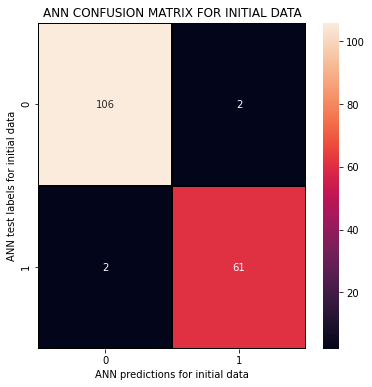

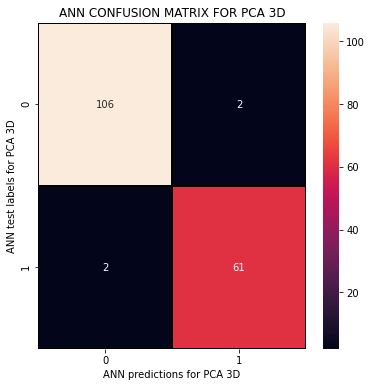

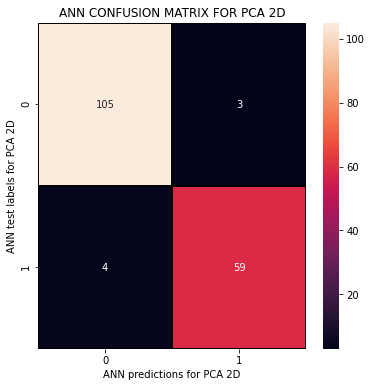

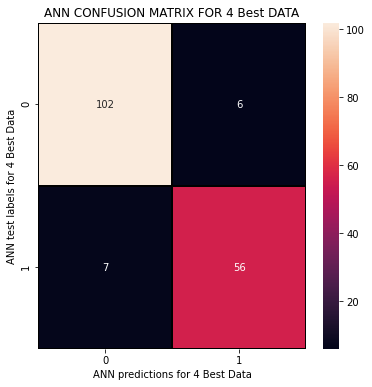

In [73]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_ann1     = confusion_matrix(dfTestLabels, npPredictions_1hidden)
cm_ann1_3D  = confusion_matrix(dfTestLabels, npPredictions_1hidden_3D)
cm_ann1_2D  = confusion_matrix(dfTestLabels, npPredictions_1hidden_2D)
cm_ann1_4B = confusion_matrix(dfTestLabels, npPredictions_1hidden_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann1, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for initial data")
plt.ylabel("ANN test labels for initial data")
plt.title("ANN CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann1_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 3D")
plt.ylabel("ANN test labels for PCA 3D")
plt.title("ANN CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann1_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 2D")
plt.ylabel("ANN test labels for PCA 2D")
plt.title("ANN CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann1_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for 4 Best Data")
plt.ylabel("ANN test labels for 4 Best Data")
plt.title("ANN CONFUSION MATRIX FOR 4 Best DATA")
plt.show()


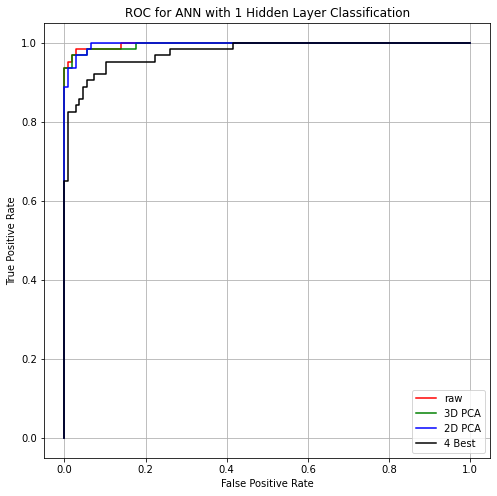

In [74]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_ANN1,     truePositiveRate_ANN1,     thresholds_ANN1     = roc_curve(dfTestLabels, npPredictions_1hidden_proba)
falsePositiveRate_ANN1_3D,  truePositiveRate_ANN1_3D,  thresholds_ANN1_3D  = roc_curve(dfTestLabels, npPredictions_1hidden_3D_proba)
falsePositiveRate_ANN1_2D,  truePositiveRate_ANN1_2D,  thresholds_ANN1_2D  = roc_curve(dfTestLabels, npPredictions_1hidden_2D_proba)
falsePositiveRate_ANN1_4B, truePositiveRate_ANN1_4B, thresholds_ANN1_4B = roc_curve(dfTestLabels, npPredictions_1hidden_4B_proba)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_ANN1, truePositiveRate_ANN1, color='red', label="raw")
plt.plot(falsePositiveRate_ANN1_3D,  truePositiveRate_ANN1_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_ANN1_2D,  truePositiveRate_ANN1_2D,  color='blue', label="2D PCA")
plt.plot(falsePositiveRate_ANN1_4B, truePositiveRate_ANN1_4B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for ANN with 1 Hidden Layer Classification')
plt.legend()
plt.grid()

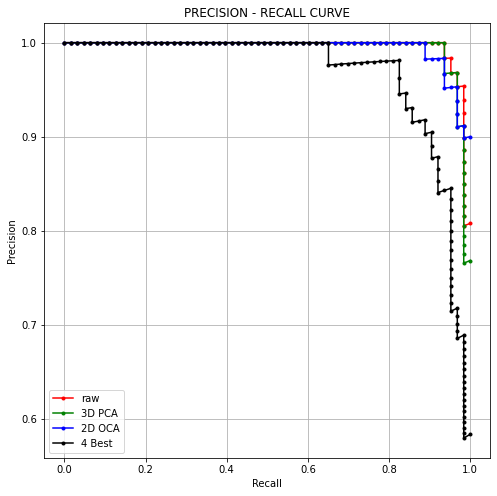

In [75]:
from sklearn.metrics import precision_recall_curve
precision_ann_1hidden,     recall_ann_1hidden,     _ = precision_recall_curve(npTestLabels,     npPredictions_1hidden_proba)
precision_ann_1hidden_3D,  recall_ann_1hidden_3D,  _ = precision_recall_curve(npTestLabels_3D,  npPredictions_1hidden_3D_proba)
precision_ann_1hidden_2D,  recall_ann_1hidden_2D,  _ = precision_recall_curve(npTestLabels_2D,  npPredictions_1hidden_2D_proba)
precision_ann_1hidden_4B, recall_ann_1hidden_4B, _ = precision_recall_curve(npTestLabels_4B, npPredictions_1hidden_4B_proba)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_ann_1hidden,     precision_ann_1hidden,     marker='.', color="red", label="raw")
plt.plot(recall_ann_1hidden_3D,  precision_ann_1hidden_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_ann_1hidden_2D,  precision_ann_1hidden_2D,  marker='.', color="blue", label="2D OCA")
plt.plot(recall_ann_1hidden_4B, precision_ann_1hidden_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

In [0]:
# creating the model for 
# ANN with 2 hidden layer
class ANNModel_2Hidden(nn.Module):
    def __init__(self, inputSize, hiddenSize1, hiddenSize2, outputSize):
        super().__init__()
        self.model1 = nn.Linear(inputSize, hiddenSize1)
        self.model2 = nn.Linear(hiddenSize1, hiddenSize2)
        self.model3 = nn.Linear(hiddenSize2, outputSize)
  
    def propagateForward(self, x):
        y_head1 = torch.sigmoid( self.model1(x) )
        y_head2 = torch.sigmoid( self.model2(y_head1) )
        y_head3 = torch.sigmoid( self.model3(y_head2) )
        return y_head3      
  
    def predictTests(self, xTest):
        predictions = self.propagateForward(xTest)
    
        for i in range(predictions.shape[0]):
            if (predictions[i] > 0.5):
                predictions[i] = 1
            else:
                predictions[i] = 0

        return predictions
    
    def predictTestsProba(self, xTest):
        return self.propagateForward(xTest)

In [0]:
ann_model_2hidden     = ANNModel_2Hidden(30, 5, 5, 1)
ann_model_2hidden_2D  = ANNModel_2Hidden( 2, 5, 5, 1)
ann_model_2hidden_3D  = ANNModel_2Hidden( 3, 5, 5, 1)
ann_model_2hidden_4B = ANNModel_2Hidden(4, 5, 5, 1)
criterion = nn.BCELoss()
optimizer_2hidden = torch.optim.Adam(ann_model_2hidden.parameters(), lr=0.01)
optimizer_2hidden_3D  = torch.optim.Adam(ann_model_2hidden_3D.parameters(),  lr=0.01)
optimizer_2hidden_2D  = torch.optim.Adam(ann_model_2hidden_2D.parameters(),  lr=0.01)
optimizer_2hidden_4B = torch.optim.Adam(ann_model_2hidden_4B.parameters(), lr=0.01)

In [0]:
for i in range(1000):
    y_head = ann_model_2hidden.propagateForward(tensorTrainFeatures.float())    
    y_head_2D = ann_model_2hidden_2D.propagateForward(tensorTrainFeatures_2D.float())    
    y_head_3D = ann_model_2hidden_3D.propagateForward(tensorTrainFeatures_3D.float())    
    y_head_4B = ann_model_2hidden_4B.propagateForward(tensorTrainFeatures_4B.float())    
    
    loss_2hidden = criterion(y_head, tensorTrainLabels.float())
    loss_2hidden_2D  = criterion(y_head_2D, tensorTrainLabels_2D.float())
    loss_2hidden_3D  = criterion(y_head_3D, tensorTrainLabels_3D.float())
    loss_2hidden_4B = criterion(y_head_4B, tensorTrainLabels_4B.float())

    optimizer_2hidden.zero_grad()
    optimizer_2hidden_2D.zero_grad()
    optimizer_2hidden_3D.zero_grad()
    optimizer_2hidden_4B.zero_grad()
    
    loss_2hidden.backward()
    loss_2hidden_2D.backward()
    loss_2hidden_3D.backward()
    loss_2hidden_4B.backward()  
    
    optimizer_2hidden.step()
    optimizer_2hidden_2D.step()
    optimizer_2hidden_3D.step()
    optimizer_2hidden_4B.step()   

In [0]:
tensorPredictions_2hidden     = ann_model_2hidden.predictTests( tensorTestFeatures.float() )
tensorPredictions_2hidden_2D  = ann_model_2hidden_2D.predictTests( tensorTestFeatures_2D.float() )
tensorPredictions_2hidden_3D  = ann_model_2hidden_3D.predictTests( tensorTestFeatures_3D.float() )
tensorPredictions_2hidden_4B = ann_model_2hidden_4B.predictTests( tensorTestFeatures_4B.float() )

npPredictions_2hidden = tensorPredictions_2hidden.detach().numpy()
npPredictions_2hidden_2D  = tensorPredictions_2hidden_2D.detach().numpy()
npPredictions_2hidden_3D  = tensorPredictions_2hidden_3D.detach().numpy()
npPredictions_2hidden_4B = tensorPredictions_2hidden_4B.detach().numpy()

tensorPredictions_2hidden_proba     = ann_model_2hidden.predictTestsProba( tensorTestFeatures.float() )
tensorPredictions_2hidden_2D_proba  = ann_model_2hidden_2D.predictTestsProba( tensorTestFeatures_2D.float() )
tensorPredictions_2hidden_3D_proba  = ann_model_2hidden_3D.predictTestsProba( tensorTestFeatures_3D.float() )
tensorPredictions_2hidden_4B_proba = ann_model_2hidden_4B.predictTestsProba( tensorTestFeatures_4B.float() )

npPredictions_2hidden_proba = tensorPredictions_2hidden_proba.detach().numpy()
npPredictions_2hidden_2D_proba  = tensorPredictions_2hidden_2D_proba.detach().numpy()
npPredictions_2hidden_3D_proba  = tensorPredictions_2hidden_3D_proba.detach().numpy()
npPredictions_2hidden_4B_proba = tensorPredictions_2hidden_4B_proba.detach().numpy()

acurracy_2hidden     = getAcurracy(npPredictions_2hidden, npTestLabels)
acurracy_2hidden_2D  = getAcurracy(npPredictions_2hidden_2D,  npTestLabels_2D)
acurracy_2hidden_3D  = getAcurracy(npPredictions_2hidden_3D,  npTestLabels_3D)
acurracy_2hidden_4B = getAcurracy(npPredictions_2hidden_4B, npTestLabels_4B)

macro_precision_ann2, macro_recall_ann2, macro_fscore_ann2, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden, average='macro')
macro_precision_ann2_2D, macro_recall_ann2_2D, macro_fscore_ann2_2D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_2D, average='macro')
macro_precision_ann2_3D, macro_recall_ann2_3D, macro_fscore_ann2_3D, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_3D, average='macro')
macro_precision_ann2_4B, macro_recall_ann2_4B, macro_fscore_ann2_4B, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_4B, average='macro')

micro_precision_ann2, micro_recall_ann2, micro_fscore_ann2, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden, average='micro')
micro_precision_ann2_2D,  micro_recall_ann2_2D,  micro_fscore_ann2_2D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_2D,  average='micro')
micro_precision_ann2_3D,  micro_recall_ann2_3D,  micro_fscore_ann2_3D, _  = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_3D,  average='micro')
micro_precision_ann2_4B, micro_recall_ann2_4B, micro_fscore_ann2_4B, _ = precision_recall_fscore_support(dfTestLabels, npPredictions_2hidden_4B, average='micro')


In [80]:
# printing the results.
print('------------------------------------------------------')
print('ACURRACY FOR INITIAL DATA    : ' + str(acurracy_2hidden))
print('ACURRACY FOR PCA (3DIMENSION): ' + str(acurracy_2hidden_3D))
print('ACURRACY FOR PCA (2DIMENSION): ' + str(acurracy_2hidden_2D))
print('ACURRACY FOR 4 Best FEATURES: ' + str(acurracy_2hidden_4B))
print('------------------------------------------------------')
print("MACRO PRECISION FOR INITIAL DATA: " + str(macro_precision_ann2))
print("MACRO PRECISION PCA (2DIMENSION): " + str(macro_precision_ann2_2D))
print("MACRO PRECISION PCA (3DIMENSION): " + str(macro_precision_ann2_3D))
print("MACRO PRECISION (4 Best FEA.)  : " + str(macro_precision_ann2_4B))
print('------------------------------------------------------')
print("MACRO RECALL FOR INITIAL DATA: " + str(macro_recall_ann2))
print("MACRO RECALL PCA (2DIMENSION): " + str(macro_recall_ann2_2D))
print("MACRO RECALL PCA (3DIMENSION): " + str(macro_recall_ann2_3D))
print("MACRO RECALL (4 Best FEA.)  : " + str(macro_recall_ann2_4B))
print('------------------------------------------------------')
print("MACRO FSCORE FOR INITIAL DATA: " + str(macro_fscore_ann2))
print("MACRO FSCORE PCA (2DIMENSION): " + str(macro_fscore_ann2_2D))
print("MACRO FSCORE PCA (3DIMENSION): " + str(macro_fscore_ann2_3D))
print("MACRO FSCORE (4 Best FEA.)  : " + str(macro_fscore_ann2_4B))
print('------------------------------------------------------')
print("MICRO PRECISION FOR INITIAL DATA: " + str(micro_precision_ann2))
print("MICRO PRECISION PCA (2DIMENSION): " + str(micro_precision_ann2_2D))
print("MICRO PRECISION PCA (3DIMENSION): " + str(micro_precision_ann2_3D))
print("MICRO PRECISION (4 Best FEA.)  : " + str(micro_precision_ann2_4B))
print('------------------------------------------------------')
print("MICRO RECALL FOR INITIAL DATA: " + str(micro_recall_ann2))
print("MICRO RECALL PCA (2DIMENSION): " + str(micro_recall_ann2_2D))
print("MICRO RECALL PCA (3DIMENSION): " + str(micro_recall_ann2_3D))
print("MICRO RECALL (4 Best FEA.)  : " + str(micro_recall_ann2_4B))
print('------------------------------------------------------')
print("MICRO FSCORE FOR INITIAL DATA: " + str(micro_fscore_ann2))
print("MICRO FSCORE PCA (2DIMENSION): " + str(micro_fscore_ann2_2D))
print("MICRO FSCORE PCA (3DIMENSION): " + str(micro_fscore_ann2_3D))
print("MICRO FSCORE (4 Best FEA.)  : " + str(micro_fscore_ann2_4B))
print('------------------------------------------------------')

------------------------------------------------------
ACURRACY FOR INITIAL DATA    : 0.9824561403508771
ACURRACY FOR PCA (3DIMENSION): 0.9707602339181286
ACURRACY FOR PCA (2DIMENSION): 0.9532163742690059
ACURRACY FOR 4 Best FEATURES: 0.9181286549707602
------------------------------------------------------
MACRO PRECISION FOR INITIAL DATA: 0.9797021028037383
MACRO PRECISION PCA (2DIMENSION): 0.952682563338301
MACRO PRECISION PCA (3DIMENSION): 0.9701094998520272
MACRO PRECISION (4 Best FEA.)  : 0.9174485472154963
------------------------------------------------------
MACRO RECALL FOR INITIAL DATA: 0.9828042328042328
MACRO RECALL PCA (2DIMENSION): 0.9464285714285714
MACRO RECALL PCA (3DIMENSION): 0.966931216931217
MACRO RECALL (4 Best FEA.)  : 0.9054232804232805
------------------------------------------------------
MACRO FSCORE FOR INITIAL DATA: 0.9812122321919062
MACRO FSCORE PCA (2DIMENSION): 0.9493933116306599
MACRO FSCORE PCA (3DIMENSION): 0.9684792626728111
MACRO FSCORE (4 Best FE

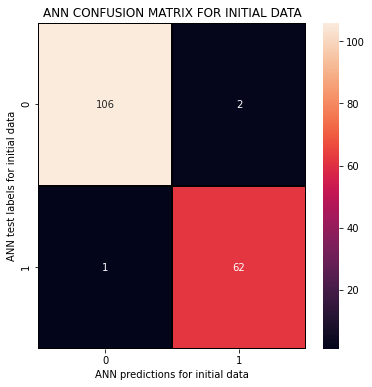

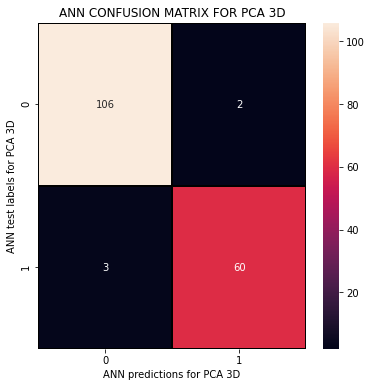

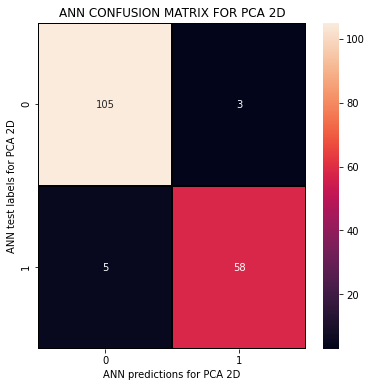

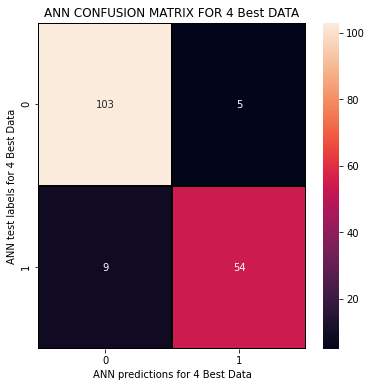

In [81]:
# printing out the confusion matrix.
from sklearn.metrics import confusion_matrix
cm_ann2     = confusion_matrix(dfTestLabels, npPredictions_2hidden)
cm_ann2_3D  = confusion_matrix(dfTestLabels, npPredictions_2hidden_3D)
cm_ann2_2D  = confusion_matrix(dfTestLabels, npPredictions_2hidden_2D)
cm_ann2_4B = confusion_matrix(dfTestLabels, npPredictions_2hidden_4B)

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann2, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for initial data")
plt.ylabel("ANN test labels for initial data")
plt.title("ANN CONFUSION MATRIX FOR INITIAL DATA")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann2_3D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 3D")
plt.ylabel("ANN test labels for PCA 3D")
plt.title("ANN CONFUSION MATRIX FOR PCA 3D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann2_2D, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for PCA 2D")
plt.ylabel("ANN test labels for PCA 2D")
plt.title("ANN CONFUSION MATRIX FOR PCA 2D")
plt.show()

f, ax = plt.subplots(figsize = (6, 6))
sns.heatmap(cm_ann2_4B, annot = True, linewidths=1, linecolor='black', fmt='.0f', ax=ax)
plt.xlabel("ANN predictions for 4 Best Data")
plt.ylabel("ANN test labels for 4 Best Data")
plt.title("ANN CONFUSION MATRIX FOR 4 Best DATA")
plt.show()

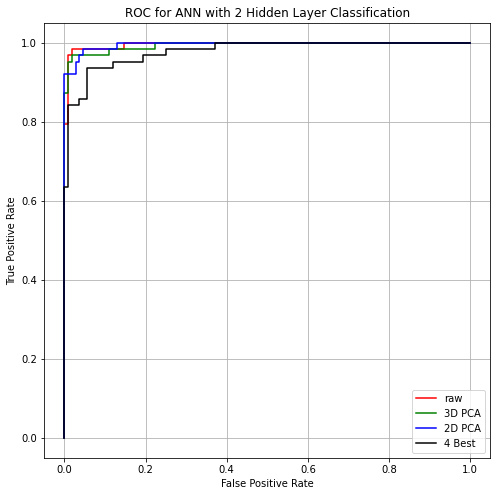

In [82]:
# importing ROC library and drawing ROC curve.
from sklearn.metrics import roc_curve

# finding out false positive rate and true positive rate
falsePositiveRate_ANN2,     truePositiveRate_ANN2,     thresholds_ANN2     = roc_curve(dfTestLabels, npPredictions_2hidden_proba)
falsePositiveRate_ANN2_3D,  truePositiveRate_ANN2_3D,  thresholds_ANN2_3D  = roc_curve(dfTestLabels, npPredictions_2hidden_3D_proba)
falsePositiveRate_ANN2_2D,  truePositiveRate_ANN2_2D,  thresholds_ANN2_2D  = roc_curve(dfTestLabels, npPredictions_2hidden_2D_proba)
falsePositiveRate_ANN2_4B, truePositiveRate_ANN2_4B, thresholds_ANN2_4B = roc_curve(dfTestLabels, npPredictions_2hidden_4B_proba)

# drawing the graph
f, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate_ANN2, truePositiveRate_ANN2, color='red', label="raw")
plt.plot(falsePositiveRate_ANN2_3D,  truePositiveRate_ANN2_3D,  color='green', label="3D PCA")
plt.plot(falsePositiveRate_ANN2_2D,  truePositiveRate_ANN2_2D,  color='blue',  label="2D PCA")
plt.plot(falsePositiveRate_ANN2_4B, truePositiveRate_ANN2_4B, color='black', label="4 Best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for ANN with 2 Hidden Layer Classification')
plt.legend()
plt.grid()

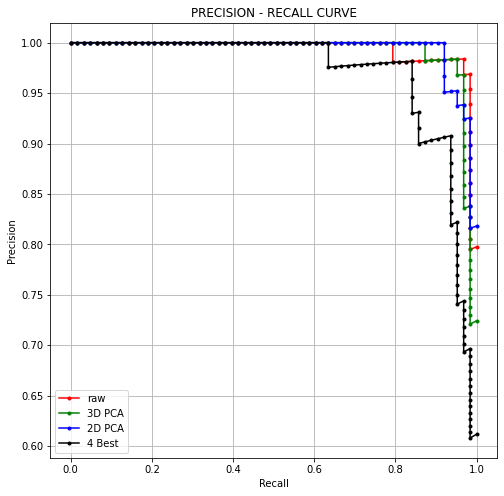

In [83]:
from sklearn.metrics import precision_recall_curve
precision_ann_2hidden,     recall_ann_2hidden,     _ = precision_recall_curve(npTestLabels,     npPredictions_2hidden_proba)
precision_ann_2hidden_3D,  recall_ann_2hidden_3D,  _ = precision_recall_curve(npTestLabels_3D,  npPredictions_2hidden_3D_proba)
precision_ann_2hidden_2D,  recall_ann_2hidden_2D,  _ = precision_recall_curve(npTestLabels_2D,  npPredictions_2hidden_2D_proba)
precision_ann_2hidden_4B, recall_ann_2hidden_4B, _ = precision_recall_curve(npTestLabels_4B, npPredictions_2hidden_4B_proba)

f, ax = plt.subplots(figsize = (8, 8))
plt.plot(recall_ann_2hidden,     precision_ann_2hidden,     marker='.', color="red",   label="raw")
plt.plot(recall_ann_2hidden_3D,  precision_ann_2hidden_3D,  marker='.', color="green", label="3D PCA")
plt.plot(recall_ann_2hidden_2D,  precision_ann_2hidden_2D,  marker='.', color="blue",  label="2D PCA")
plt.plot(recall_ann_2hidden_4B, precision_ann_2hidden_4B, marker='.', color="black", label="4 Best")

plt.title("PRECISION - RECALL CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()

<h2 style="text-align:center">DISCUSSION</h2>

<div style="text-align:justify;font-size:17px;">We do observe consistent patterns within a narrow window for performance metrics in our tests, in which we set a parameter as the independent variable or use different pre-processing methods on the feature sets. The SVM algorithm for a gamma value of 0.5 gives us the highest accuracy in the whole project at 0.98245614 for raw data. The other clear outlier in the project is the Multinomial naive bayes model which gives an accuracy of 0.8304093567251462 for raw data and 0.631578947368421 for the 4 Best features. This is expected because our feature set is made up of continuous variables so the discrete multinomial model proves to be a relative bad fit at discretizing our continuous variables. For example, in the gaussian model we do not discretize the values but rather find the means and standard deviations for continuous data. So we observe a relatively high accuracy value of 0.935672514619883. 
In terms of computational complexity, the ANN took the longest to train at 15 seconds for 1000 iterations. The programming of this part reflected this fact as it clearly does not follow the mould set by the previous algorithms. It should be noted that the lapsed time reinforces the fact that scikit-learn has optimized algorithms to the point that neural network takes mere seconds to train. It would probably require a lot more time if we were to implement our ANN from scratch. Nevertheless, Its highest reported accuracy is 0.9766081871345029.</div>

<h2 style="text-align:center">CONCLUSION</h2>
<hr>

<div style="text-align:justify;font-size:17px;">The dataset we chose turned out to be very straight forward for the algorithms to predict. This is the overarching explanation for why our performance metrics gave very high values. Due to this fact, we can safely say that all our algorithms performed very well. To fully reflect the knowledge we learned in this course, we aimed to make our project very comprehensive to demonstrate our understanding that goes beyond the application of training models and encapsulates ideas such as feature selection, feature extraction, PCA, performance matrices and the information they convey as well as how we present that information.</div>